# Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Loading Data

In [37]:
df = pd.read_csv("data.csv")

# EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   object 
 4   x5      513 non-null    object 
 5   x6      850 non-null    float64
 6   x7      1000 non-null   float64
 7   x8      1000 non-null   float64
 8   x9      1000 non-null   float64
 9   x10     1000 non-null   float64
 10  x11     1000 non-null   float64
 11  x12     1000 non-null   float64
 12  x13     1000 non-null   float64
 13  x14     1000 non-null   float64
 14  x15     1000 non-null   float64
 15  x16     1000 non-null   object 
 16  x17     1000 non-null   float64
 17  x18     1000 non-null   object 
 18  x19     864 non-null    float64
 19  x20     1000 non-null   object 
 20  x21     1000 non-null   float64
 21  x22     1000 non-null   float64
 22  x

In [39]:
df.describe()

,x1,x2,x3,x6,x7,x8,x9,x10,x11,x12,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
count,1000.000000,1000.000000,1000.000000,850.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,822.000000,1000.00000
mean,-0.027520,0.513983,-0.090537,-1.210440,-0.016750,0.010565,0.001084,-0.275223,-0.008048,-0.517808,...,0.002936,-0.014252,-0.517808,0.048355,0.047588,0.013693,-0.227753,-0.053468,0.083298,0.19300
std,2.121035,3.242106,2.148778,1.849584,1.015740,1.025354,1.033009,4.144597,0.984675,5.066099,...,1.019683,0.997306,5.066099,1.019056,1.013647,1.023539,2.468907,2.033750,1.035480,0.39485
min,-6.099206,-10.391957,-9.900032,-9.037725,-3.666805,-3.105765,-3.618622,-13.498260,-2.889831,-16.637901,...,-3.162404,-2.917222,-16.637901,-3.095309,-3.236129,-3.356436,-7.901218,-7.232486,-2.751643,0.00000
25%,-1.514951,-1.708530,-1.556960,-2.435937,-0.677575,-0.661585,-0.735213,-2.882376,-0.656283,-3.804147,...,-0.656209,-0.687829,-3.804147,-0.604802,-0.632033,-0.633514,-1.855397,-1.393314,-0.644342,0.00000
50%,-0.124508,0.562613,0.033638,-1.176528,-0.028013,-0.058568,0.025955,-0.130196,-0.008283,-0.387942,...,-0.027994,-0.047266,-0.387942,0.034554,0.010712,0.047589,-0.220056,-0.019715,0.125144,0.00000
75%,1.289833,2.713078,1.405191,0.096288,0.630085,0.699194,0.723170,2.350465,0.638198,2.813306,...,0.675595,0.706127,2.813306,0.719285,0.708858,0.698909,1.434233,1.432528,0.796340,0.00000
max,6.507043,11.290847,6.222848,5.879442,3.275454,3.431538,3.235282,12.368714,3.332967,19.649202,...,3.399904,3.567435,19.649202,3.642269,3.807703,3.458322,7.787713,6.299200,3.590011,1.00000


# What’s Happening in the Dataset?
This dataset has 61 columns: 60 columns labeled x1 through x60 and one column called y. Here’s what’s going on:

Lots of Features: The 60 x columns (x1 to x60) are different pieces of information about each item. Think of them as characteristics or measurements that describe something, like height, weight, or color in a simpler example.
A Mix of Data Types: Some of these columns have numbers (like 2.42 or -0.95), while others have letters (like a8 or e2). This means some columns are about quantities (numerical), and others are about categories or groups (categorical).
Missing Information: Sometimes, there are gaps in the data (shown as consecutive commas, like ,,), meaning some items don’t have values for certain columns.
A Goal or Label: The y column seems to be what we’re trying to figure out or predict. It has values like 0 or 1, which suggests it’s a yes/no or true/false type of answer.

# Checking for null values

In [40]:
df.isnull().sum().head(100)

x1       0
x2       0
x3       0
x4       0
x5     487
      ... 
x57      0
x58      0
x59      0
x60    178
y        0
Length: 61, dtype: int64

As see  above there are  columns with null values now here i can do 2 steps on is to remove those columns and other is removing null values using dropna() function. or fillna function to fill the values

# Removing  null values

In [41]:
df.dropna(inplace=True)

# again checking

In [42]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x57    0
x58    0
x59    0
x60    0
y      0
Length: 61, dtype: int64

# Now  is the problem
#### here is one problem if there are multiple null values in the dataset so by simply removing them might decrease the size of data set which will effect out prediction accuracy . So we need to handle this situation by replacing the null values with some values which  are closer to the other values 

### As i mentioned earlier we have two types of data one is numerical and other is categorical so we need to handle them separately

for numeical values we will take mean to fill the null values and for categorical values we will take mode to fill the null values 

# Now here is the Qs why we take mean and mode 
#### The reason is that mean is the average of all the values and mode is the most frequent value in the dataset so by taking these values we are not changing the distribution of the data set which will effect our prediction accuracy we are just filling the null values with similar values 

# Reloading dataset and again checking for null values

In [43]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x57    0
x58    0
x59    0
x60    0
y      0
Length: 61, dtype: int64

# Filling similarv values

In [44]:
# Numerical columns (e.g., integers, floats)
num_cols = df.select_dtypes(include=['number']).columns

# Categorical columns (e.g., strings, objects)
cat_cols = df.select_dtypes(include=['object']).columns

In [45]:
# Fill numerical columns with the mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with the mode
for col in cat_cols:
    if not df[col].mode().empty:  # Check if mode exists
        df[col] = df[col].fillna(df[col].mode().iloc[0])  # Use first mode

Again checking only for confermation

In [46]:
# null removed  values after filling
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x57    0
x58    0
x59    0
x60    0
y      0
Length: 61, dtype: int64

# Now about Outlyers in dataset
. Outliers are data points that significantly differ from the rest of the data, and identifying them is crucial for ensuring accurate analysis or modeling.

## Checking for Outliers in Numerical Columns
Identify Numerical Columns: Separate the numerical columns from your dataset. As out dataset includes a target variable (e.g., 'y'), exclude it from this process since we are  checking features, not the target.

In [47]:
num_cols = df.select_dtypes(include=['number']).columns.drop('y')

To check for outliers in a dataset, a common and effective approach is to use the 
# Interquartile Range (IQR) method

# Calculate Quartiles and IQR

- **Q1 (First Quartile)**: The 25th percentile of the data.
- **Q3 (Third Quartile)**: The 75th percentile of the data.
- **IQR (Interquartile Range)**: The difference between Q3 and Q1, i.e., 
  \[
  \text{IQR} = Q3 - Q1
  \]

## Determine Outlier Boundaries

- **Lower Bound**: 
  \[
  \text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
  \]
- **Upper Bound**: 
  \[
  \text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
  \]

Any data point below the lower bound or above the upper bound is considered an outlier.

## Identify Outliers

Check which values in each numerical column fall outside these bounds.

In [48]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in x1: 5
Outliers in x2: 1
Outliers in x3: 4
Outliers in x6: 2
Outliers in x7: 4
Outliers in x8: 5
Outliers in x9: 2
Outliers in x10: 11
Outliers in x11: 3
Outliers in x12: 4
Outliers in x13: 5
Outliers in x14: 2
Outliers in x15: 2
Outliers in x17: 2
Outliers in x19: 5
Outliers in x21: 2
Outliers in x22: 2
Outliers in x23: 3
Outliers in x24: 3
Outliers in x25: 9
Outliers in x26: 1
Outliers in x27: 0
Outliers in x28: 5
Outliers in x29: 0
Outliers in x30: 0
Outliers in x31: 2
Outliers in x32: 2
Outliers in x33: 2
Outliers in x34: 5
Outliers in x35: 1
Outliers in x36: 1
Outliers in x37: 2
Outliers in x38: 3
Outliers in x39: 4
Outliers in x40: 4
Outliers in x41: 3
Outliers in x42: 0
Outliers in x43: 4
Outliers in x44: 1
Outliers in x45: 1
Outliers in x46: 3
Outliers in x47: 4
Outliers in x48: 5
Outliers in x49: 2
Outliers in x50: 1
Outliers in x51: 5
Outliers in x52: 6
Outliers in x53: 2
Outliers in x54: 4
Outliers in x55: 7
Outliers in x56: 3
Outliers in x57: 1
Outliers in x58: 4

# Handling Outliers 
- You can remove them 
- You can clip them within range 
- You can leave them 

In [49]:
# cliping the outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

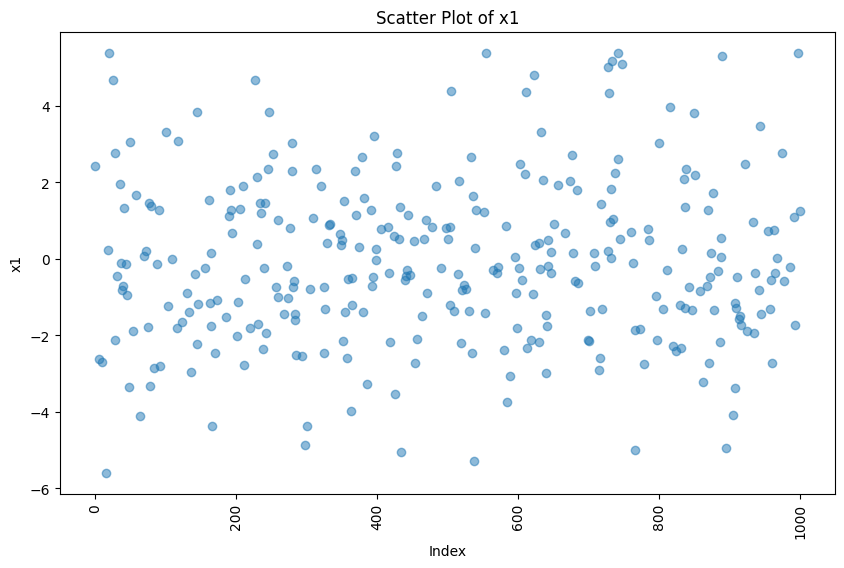

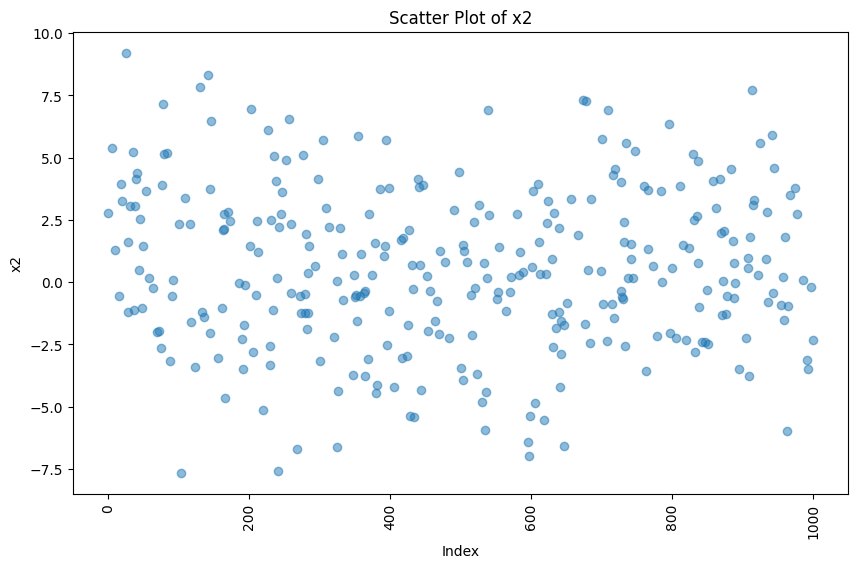

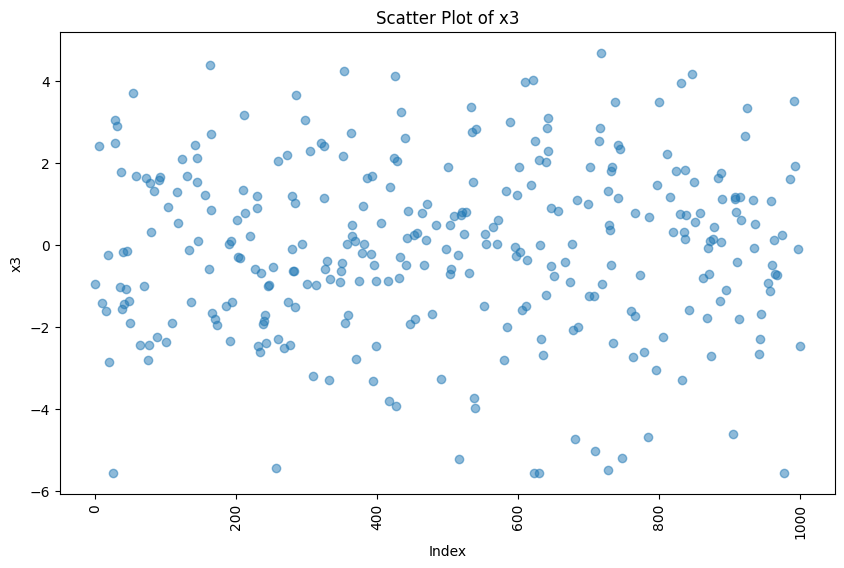

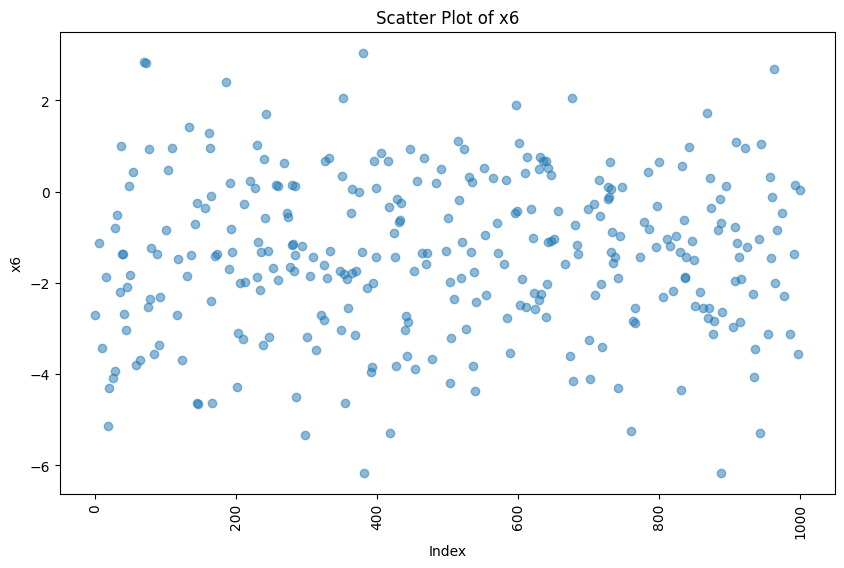

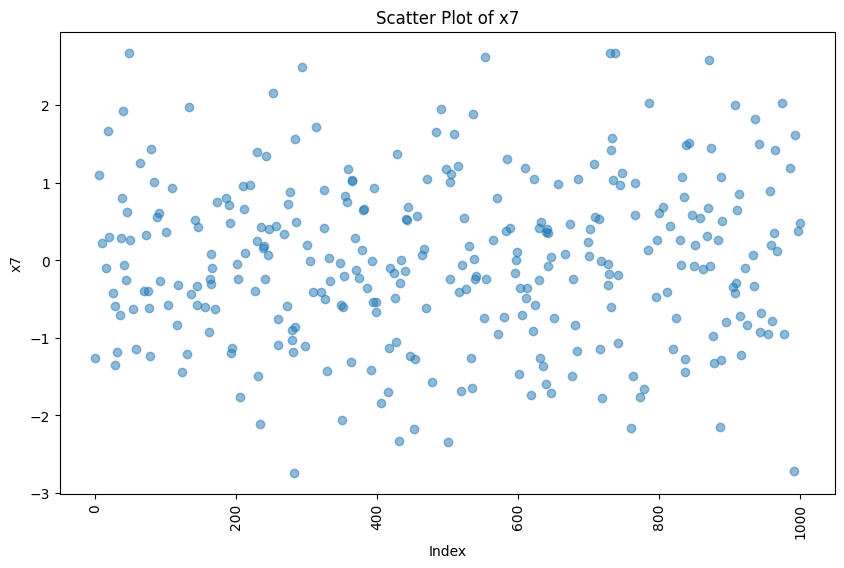

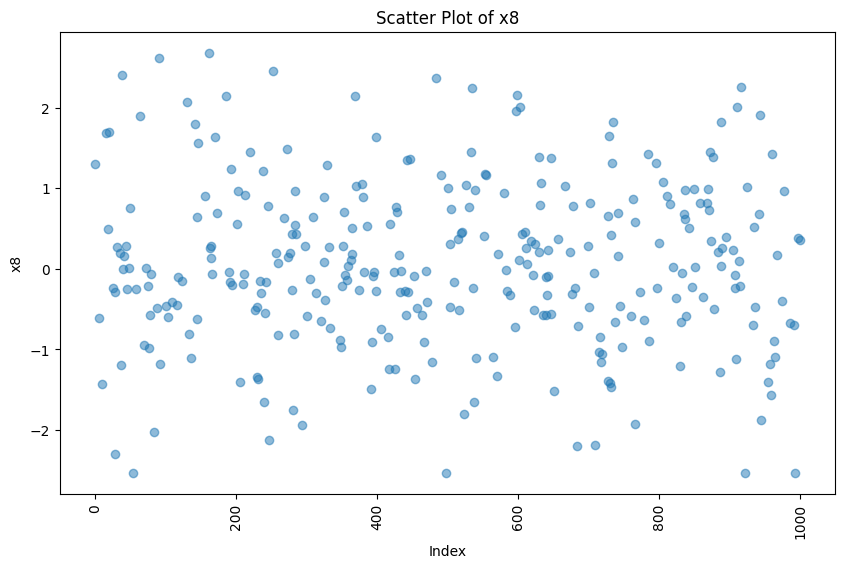

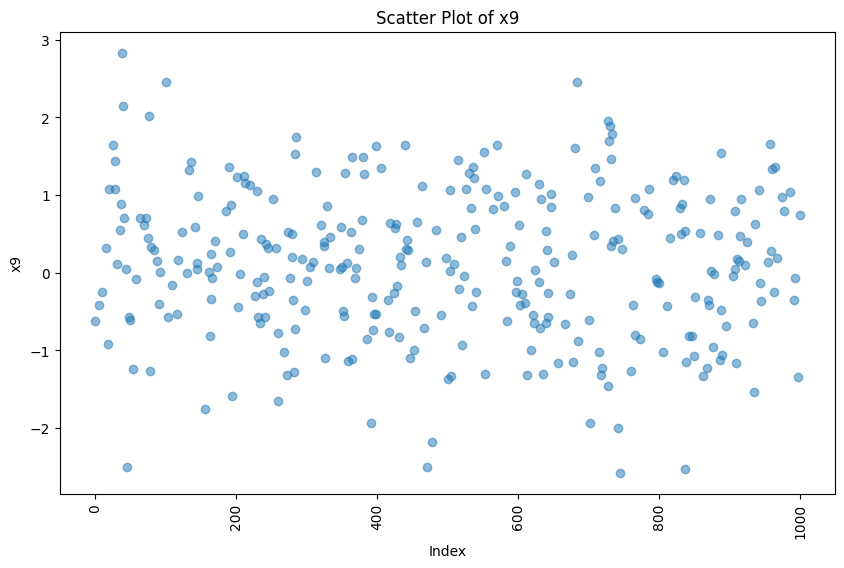

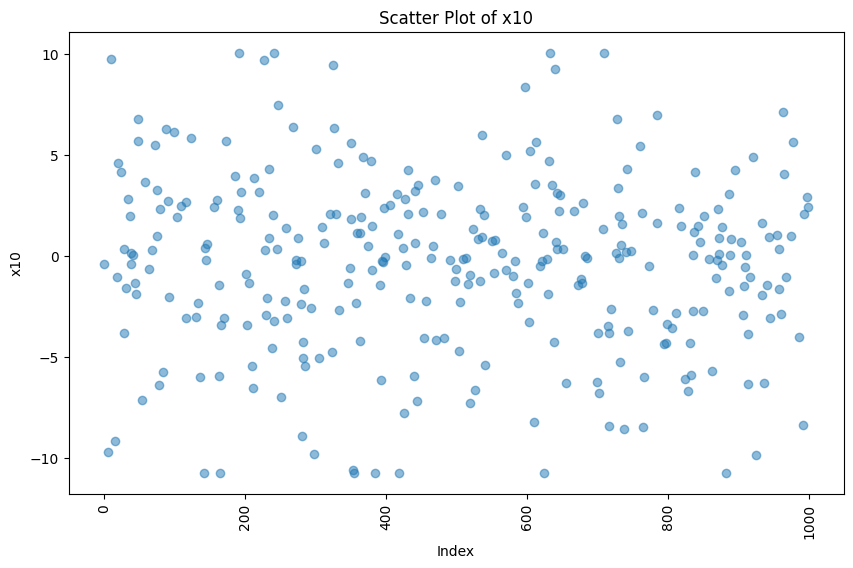

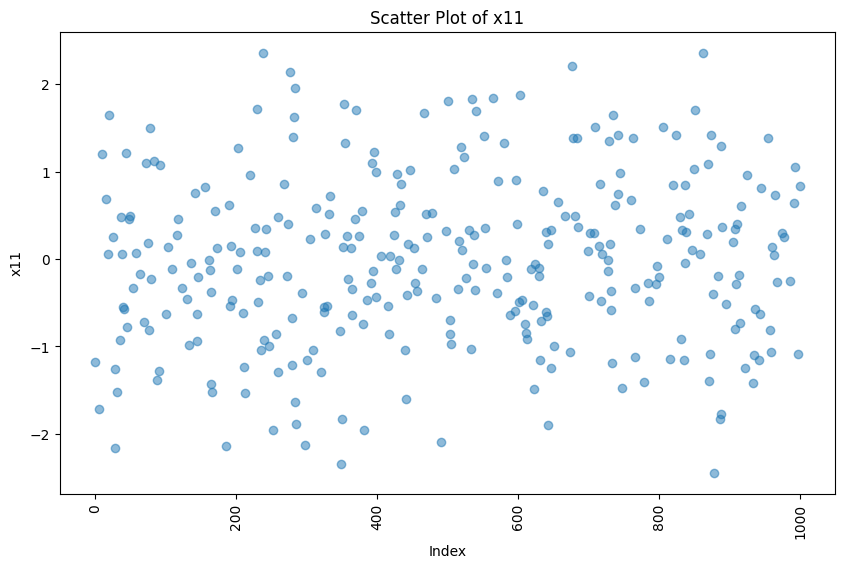

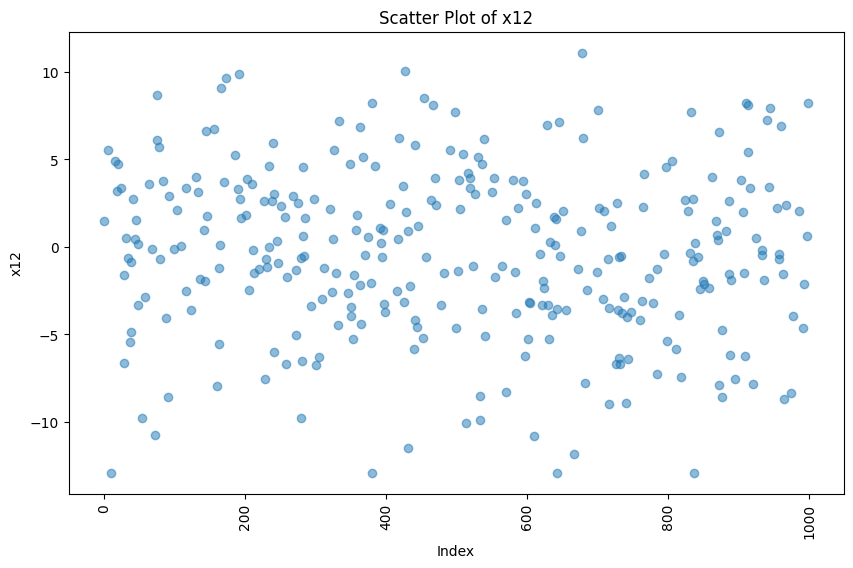

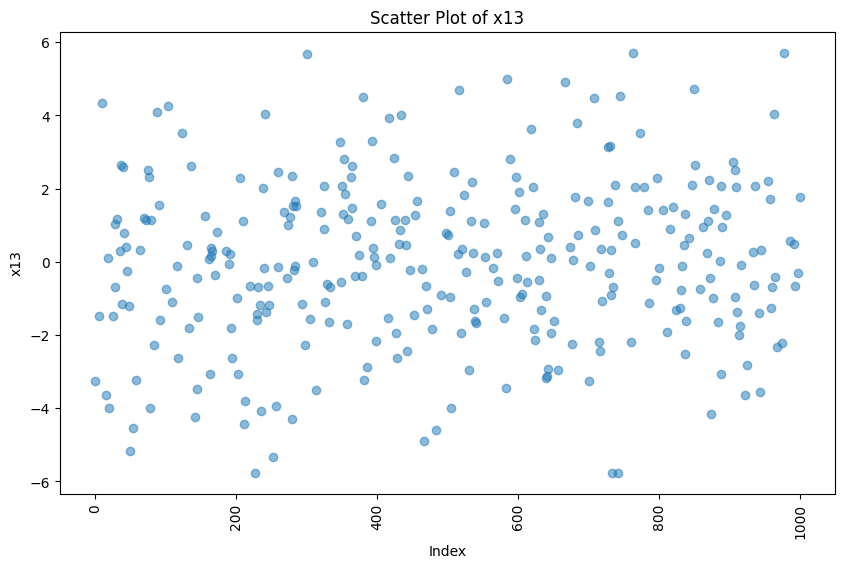

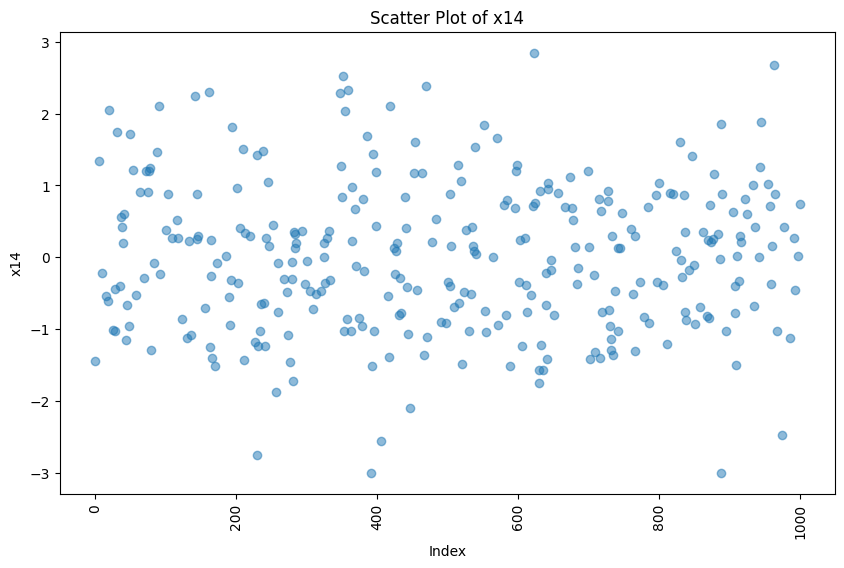

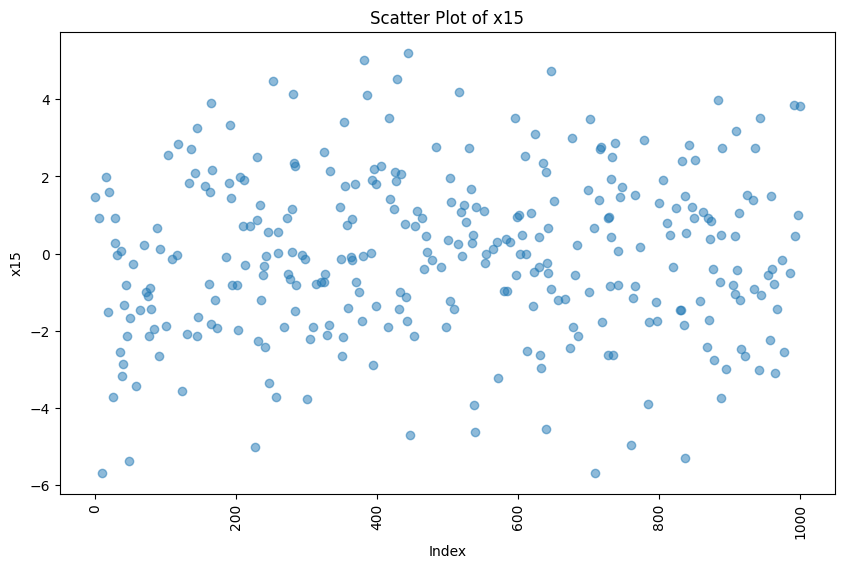

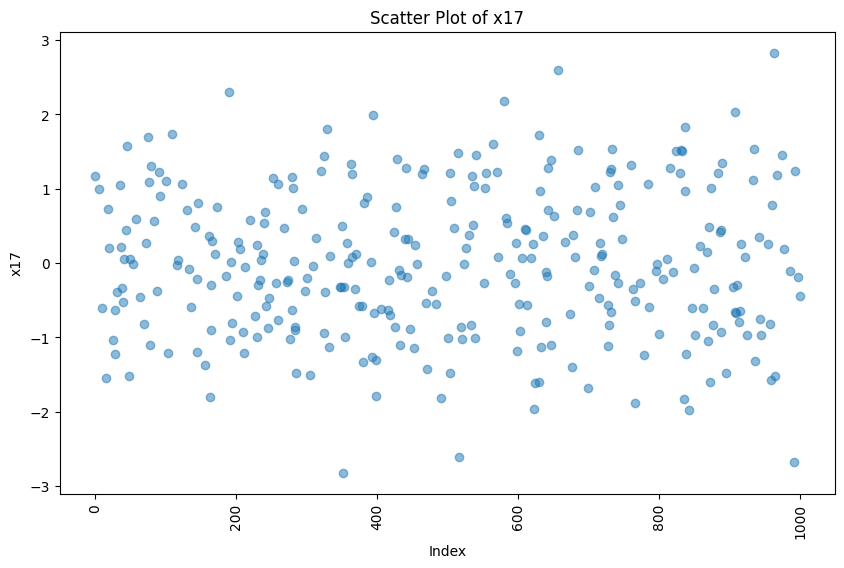

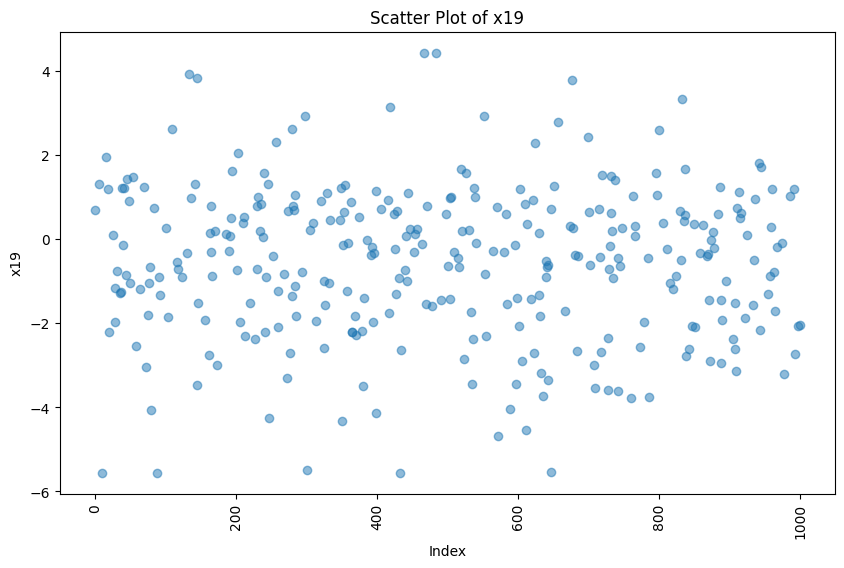

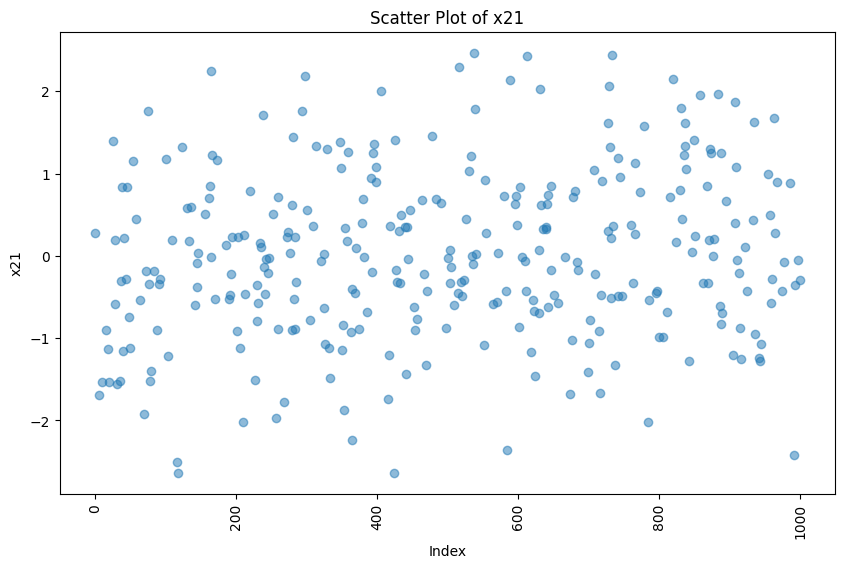

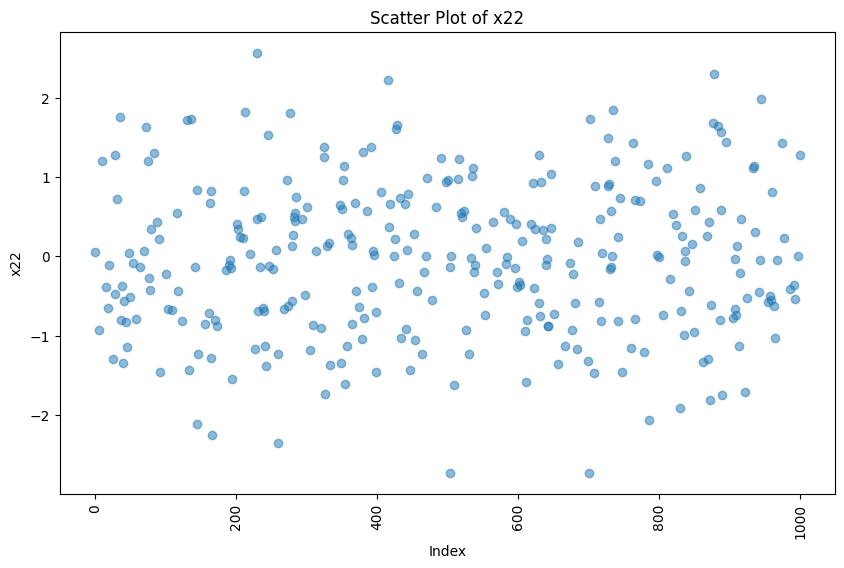

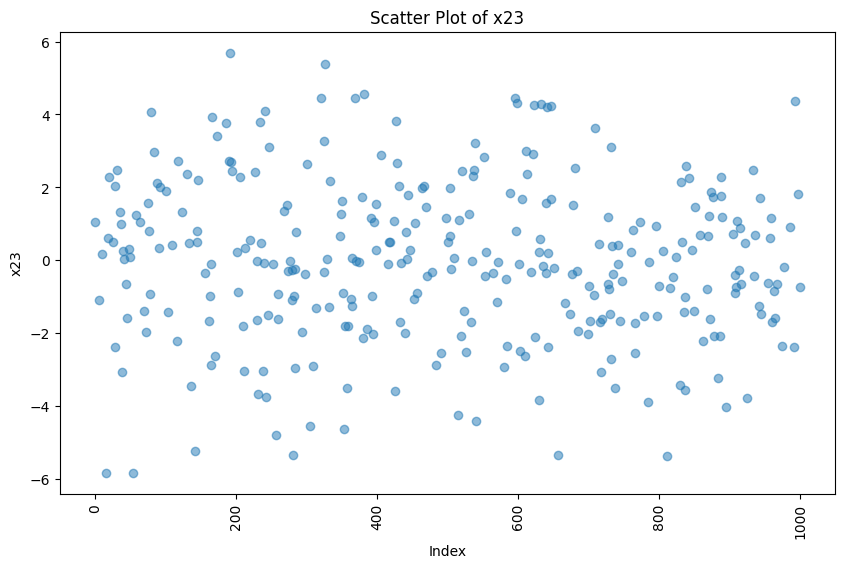

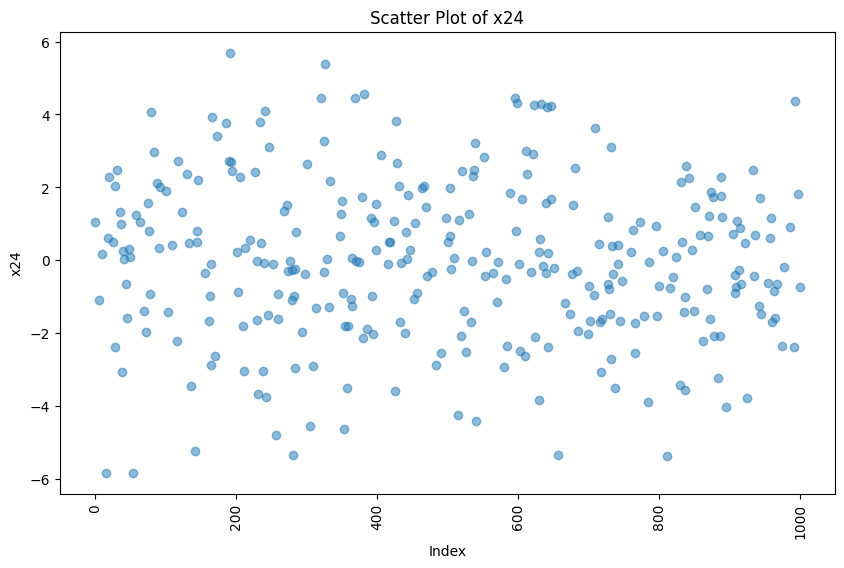

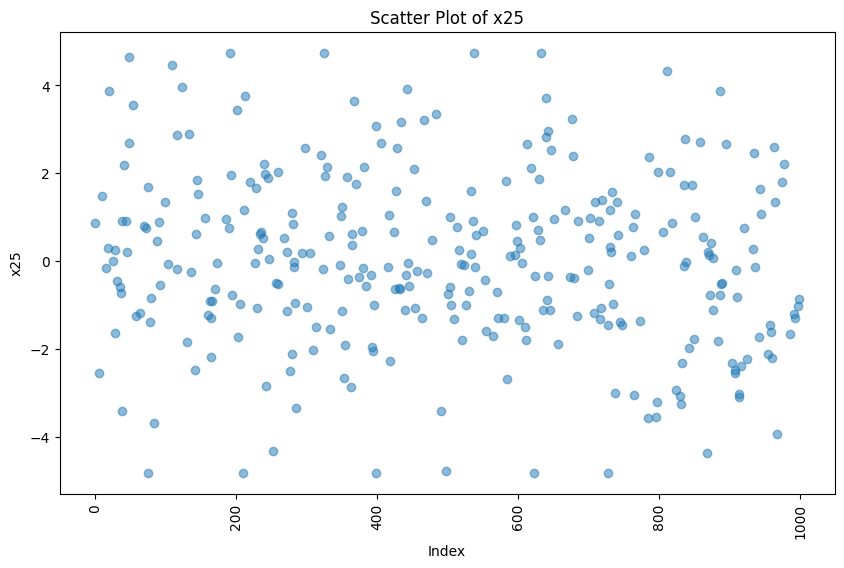

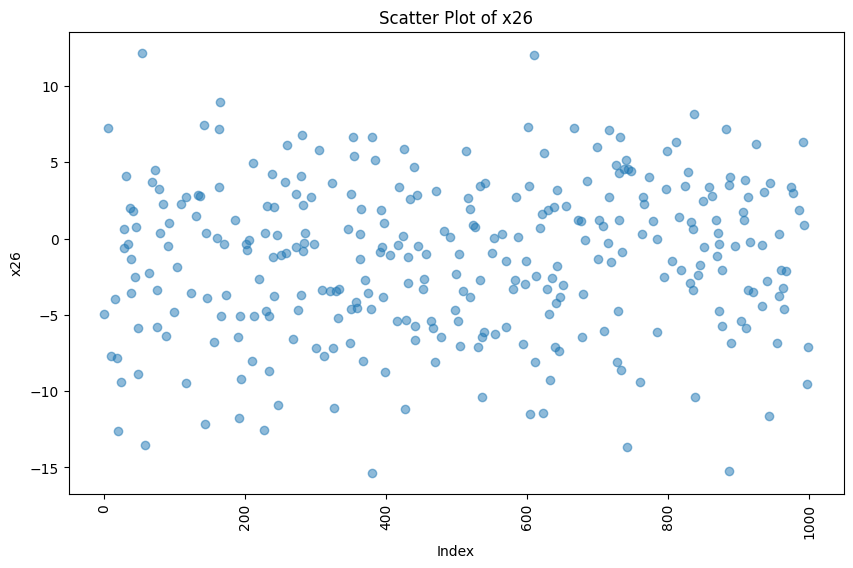

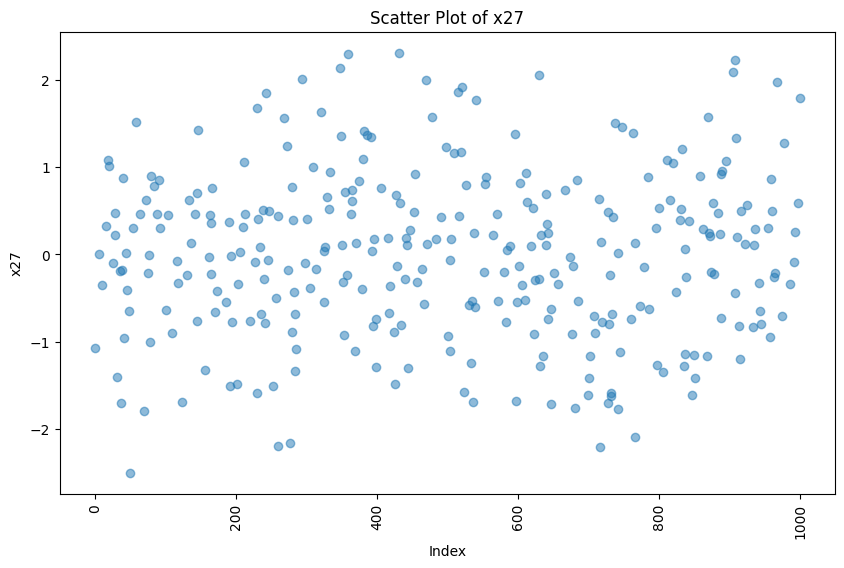

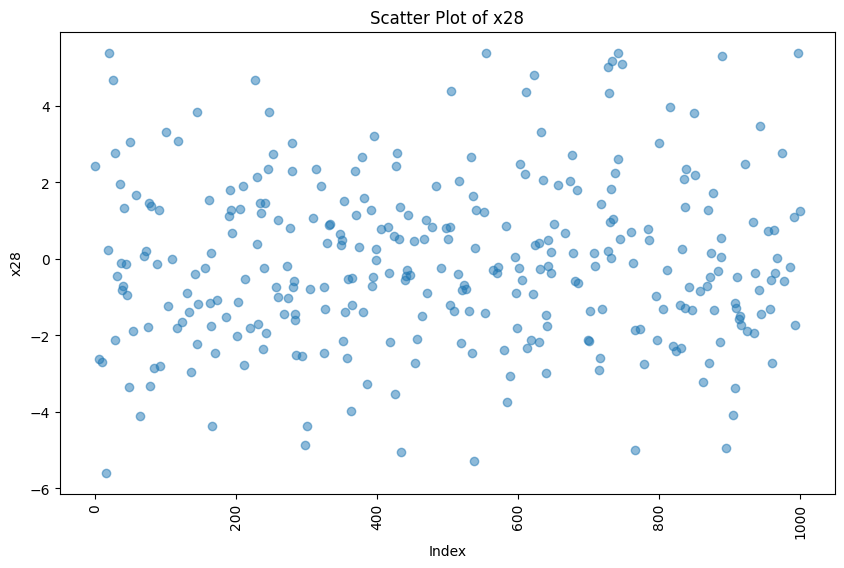

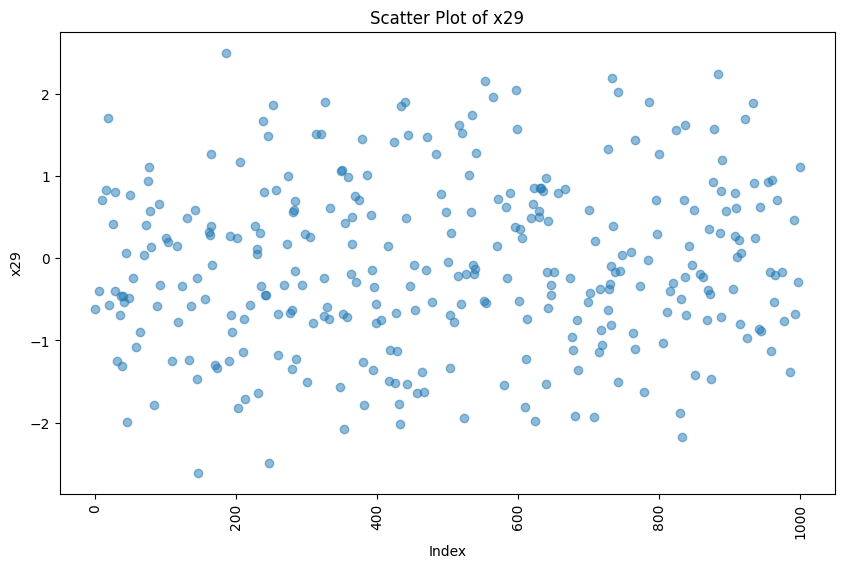

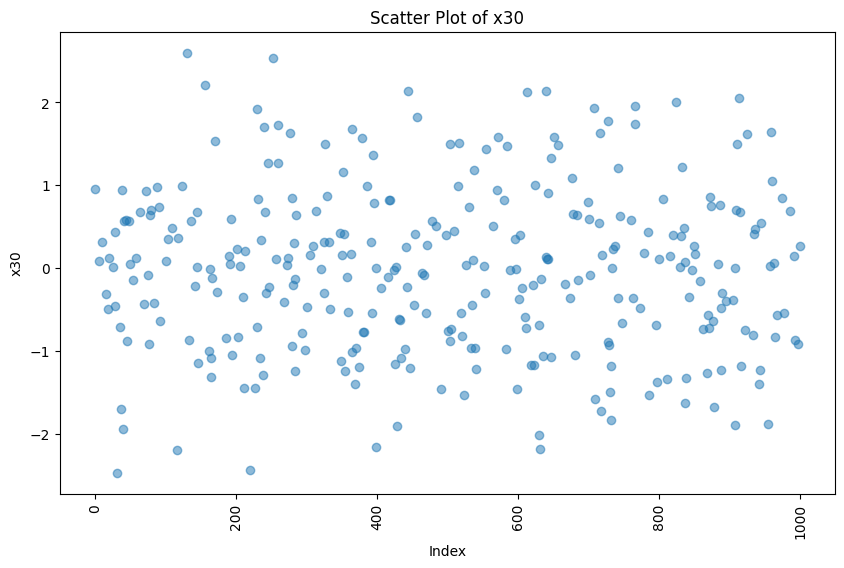

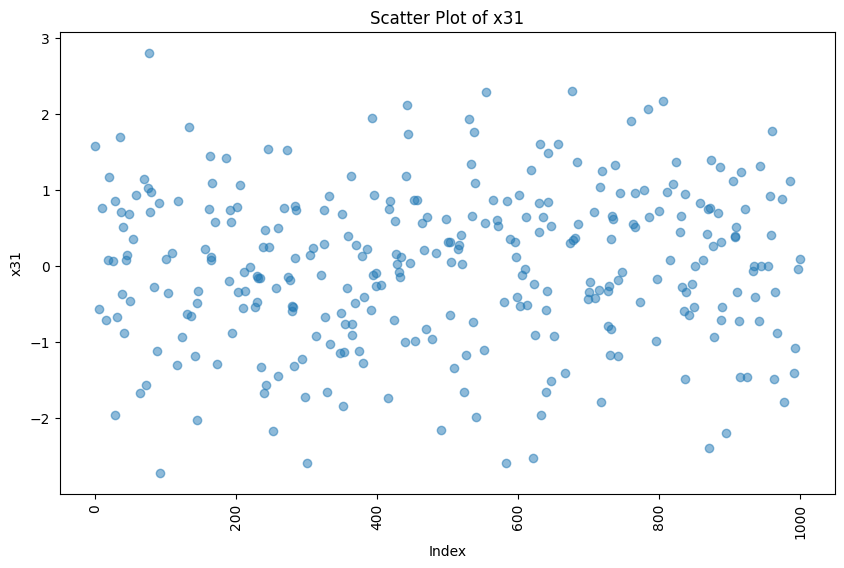

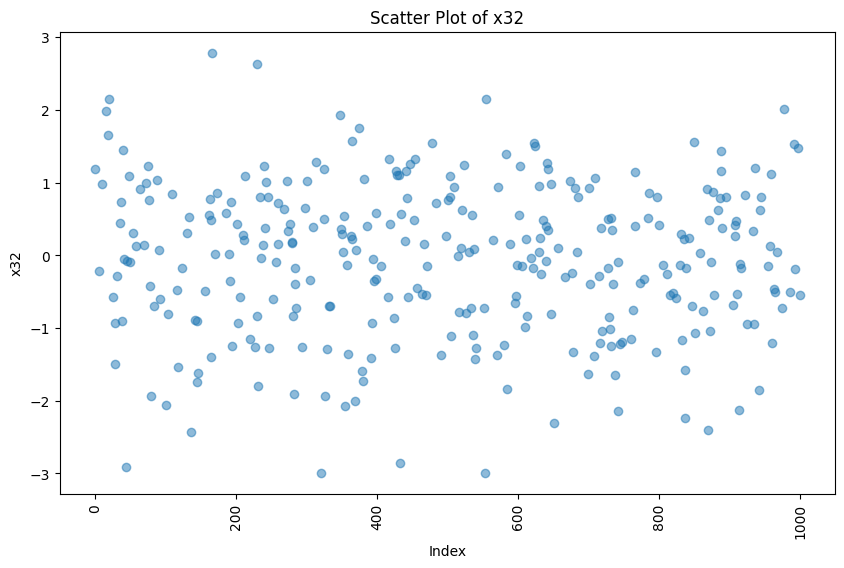

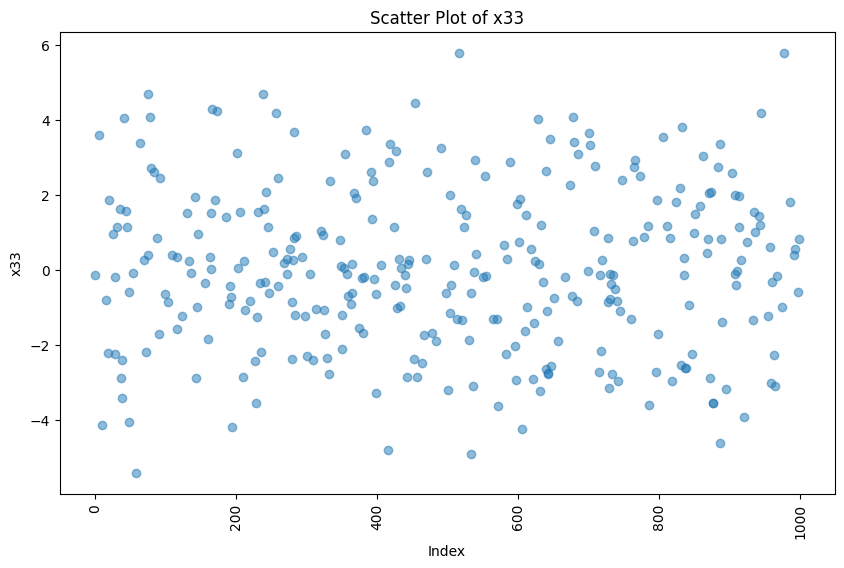

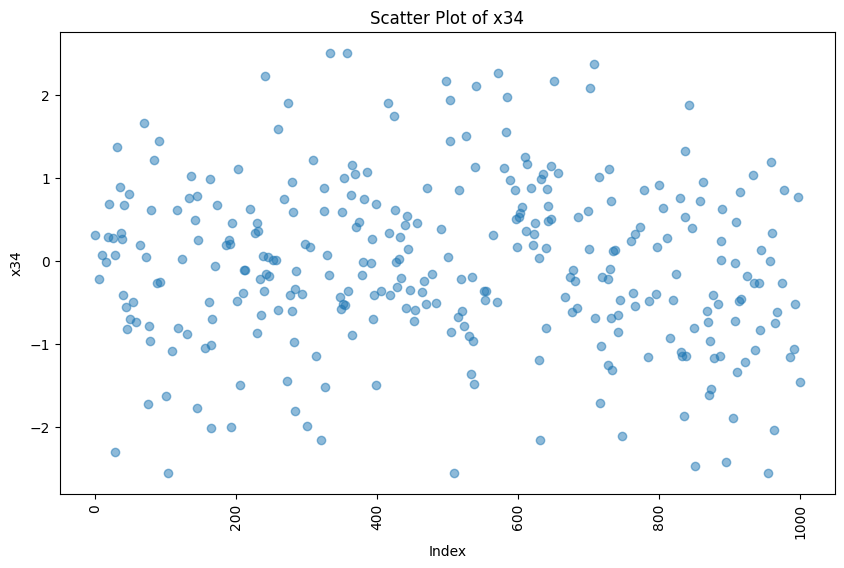

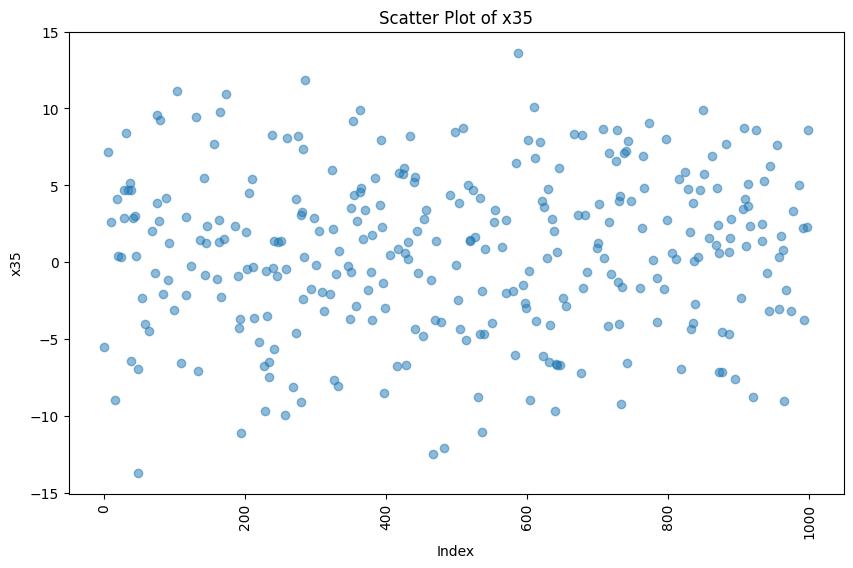

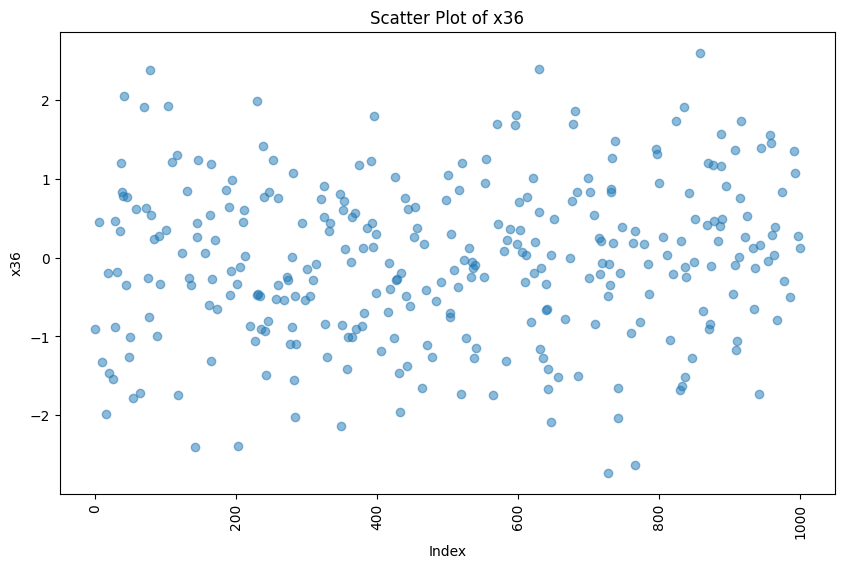

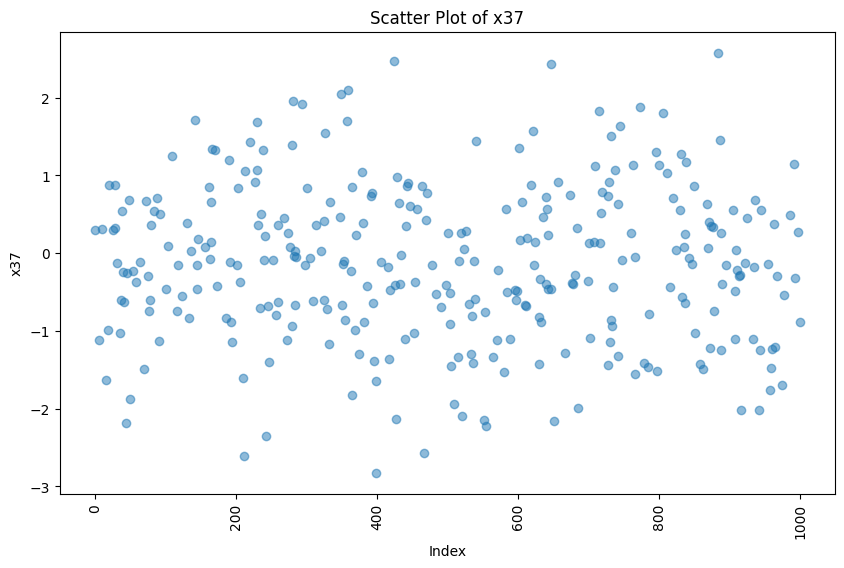

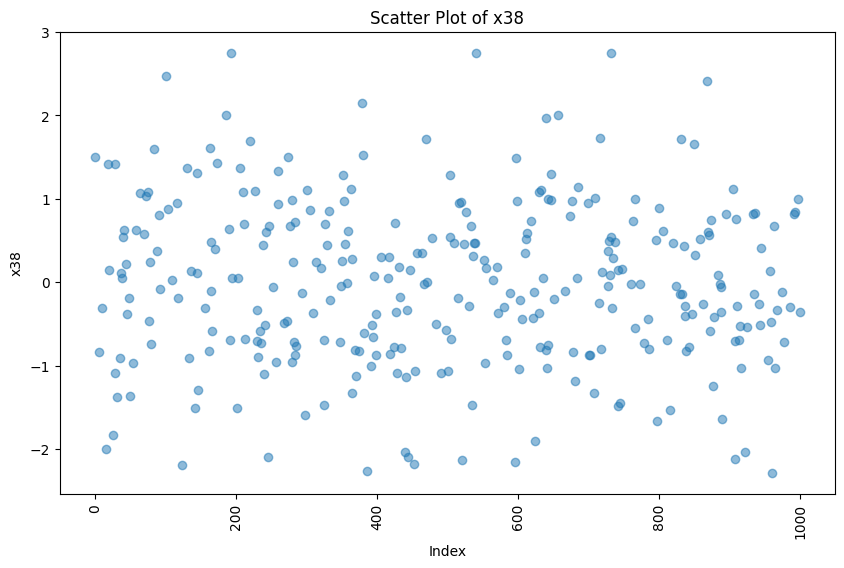

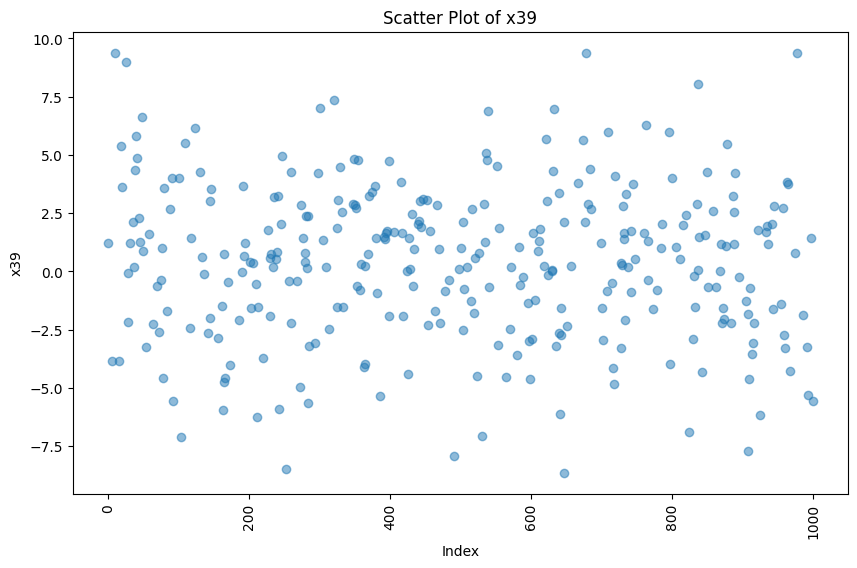

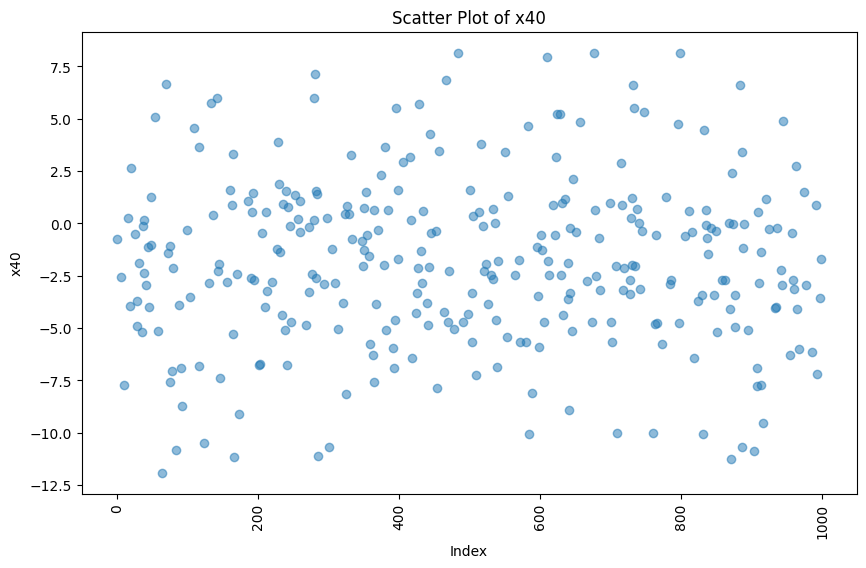

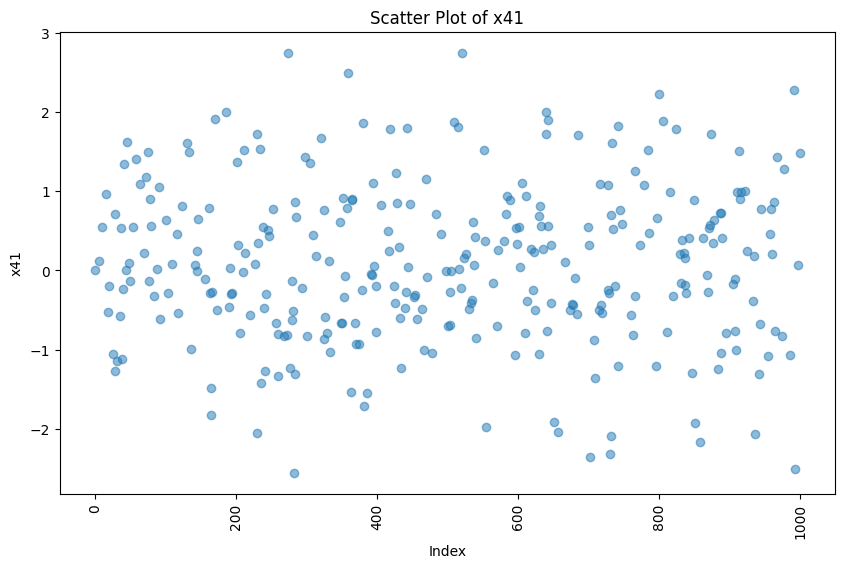

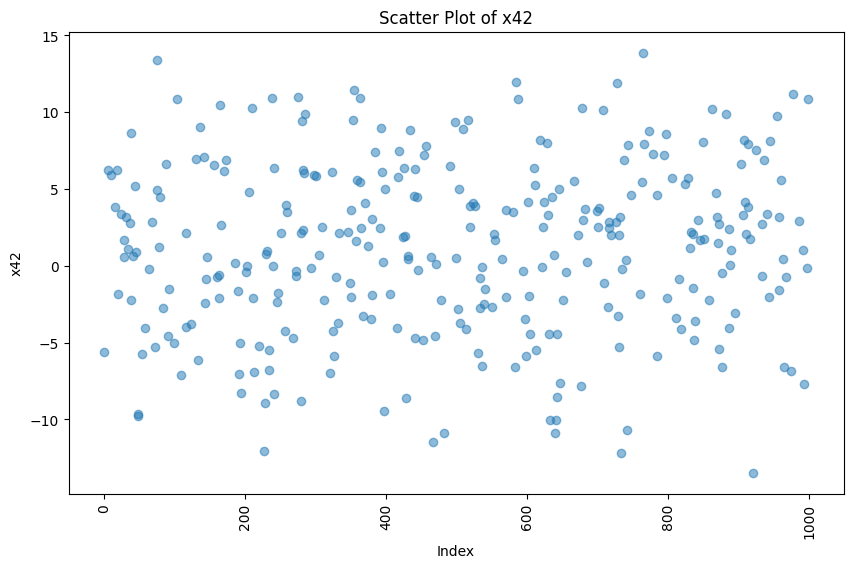

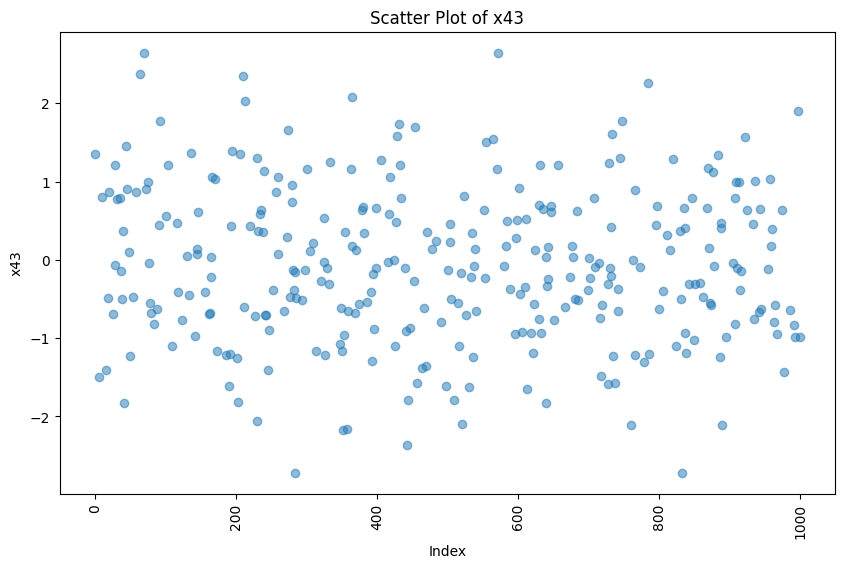

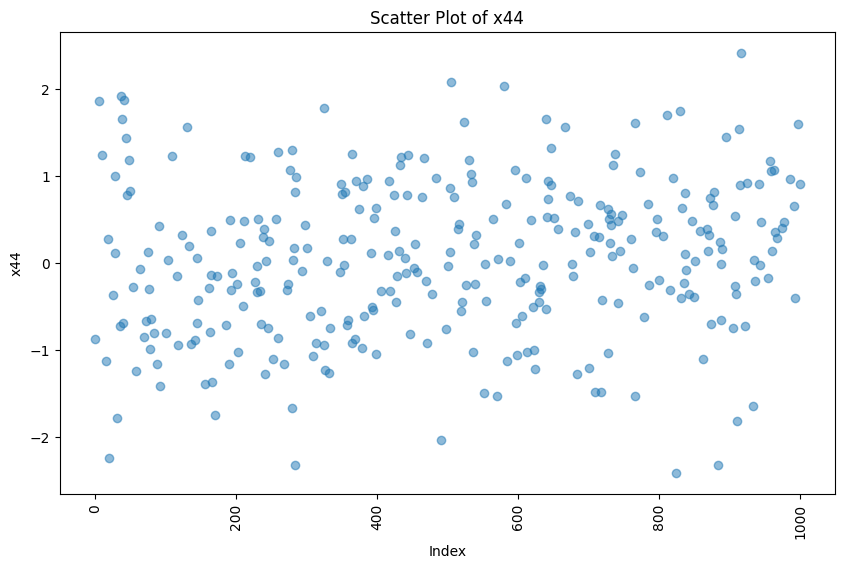

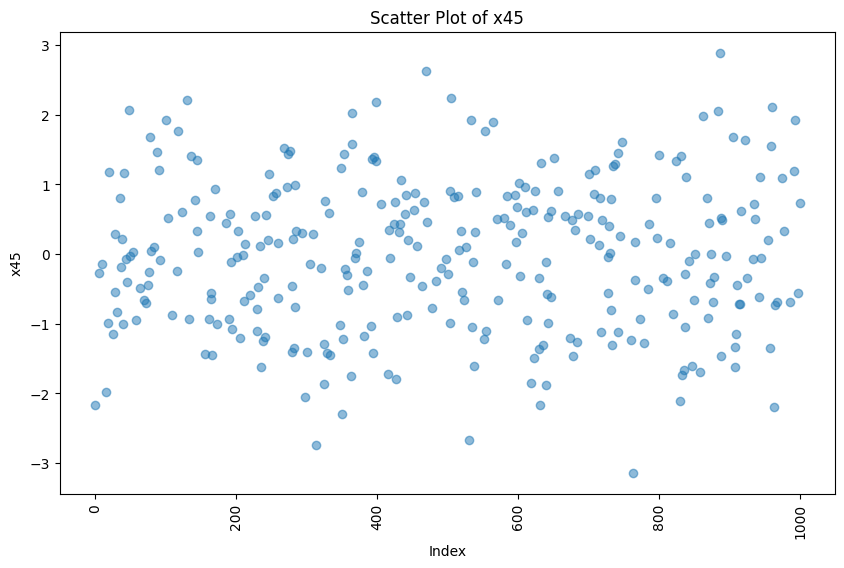

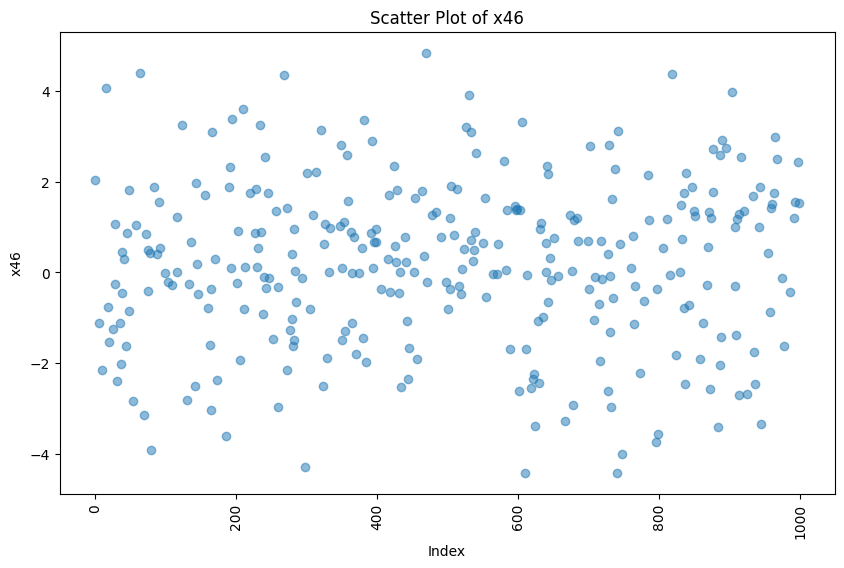

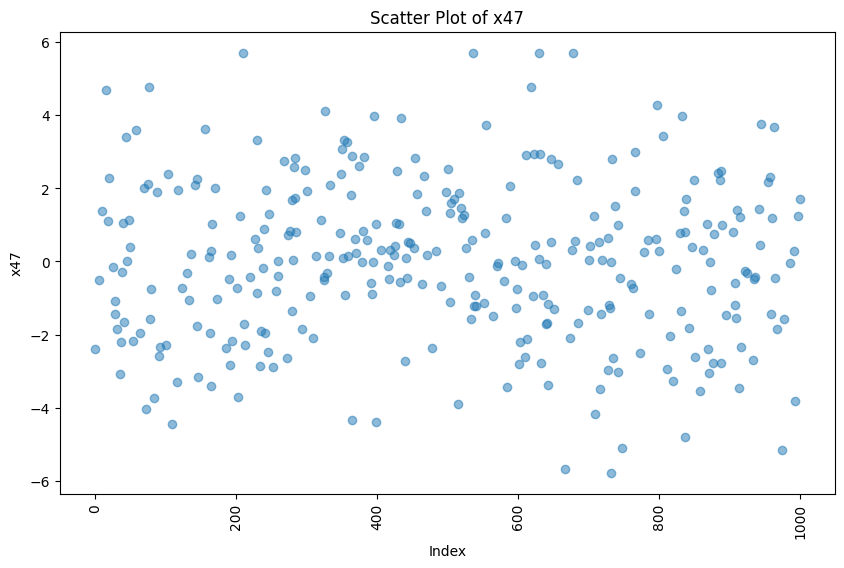

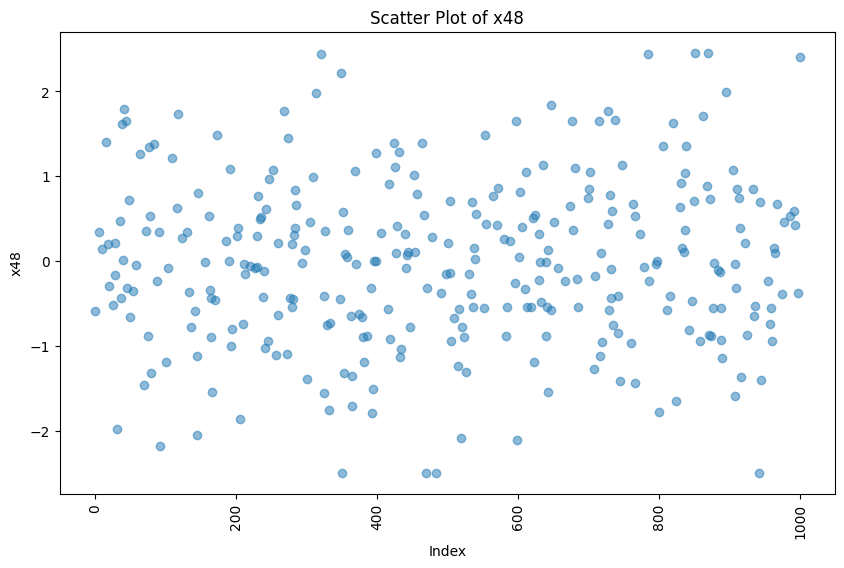

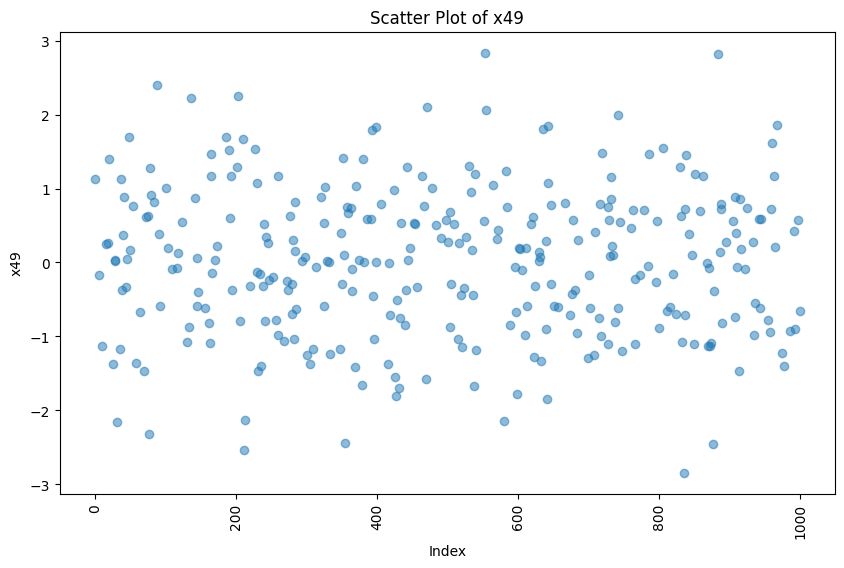

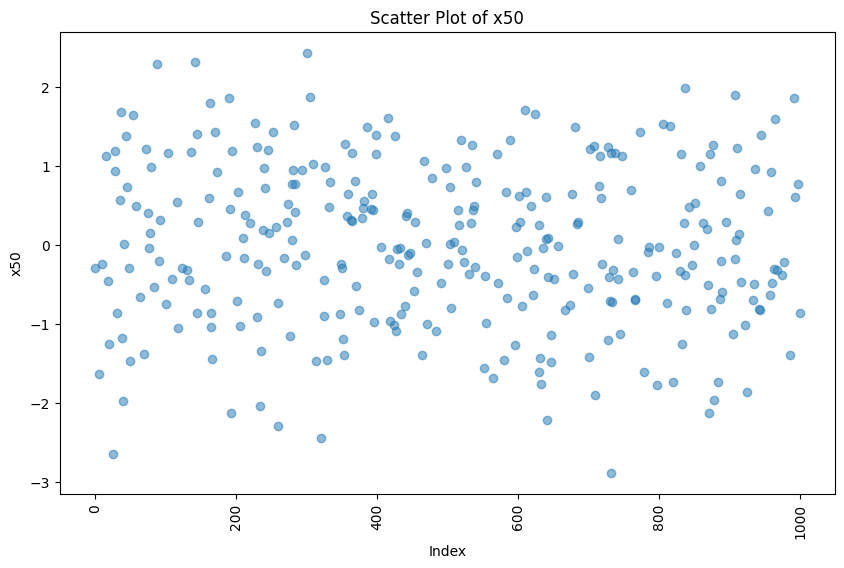

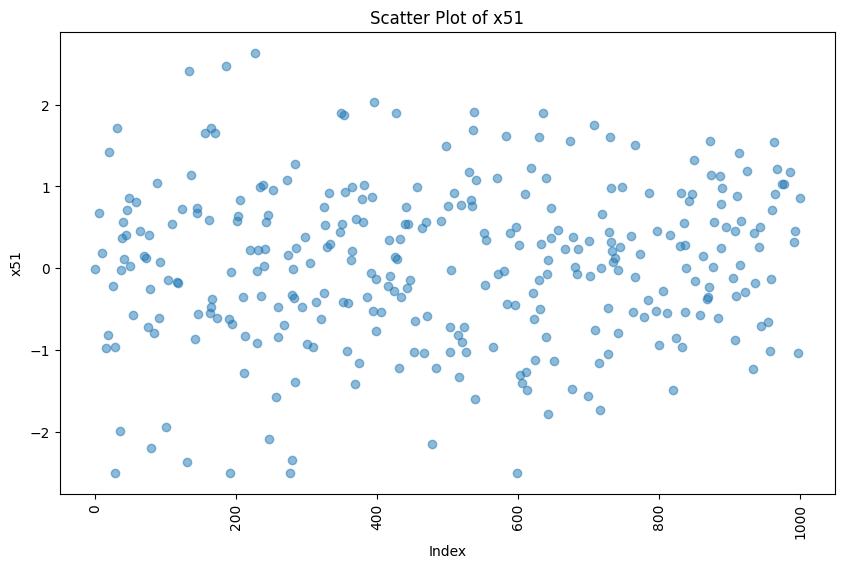

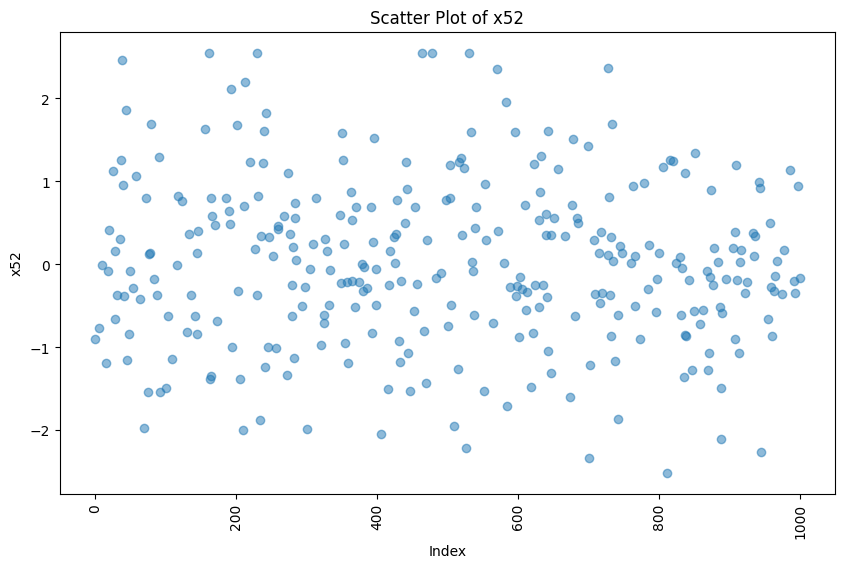

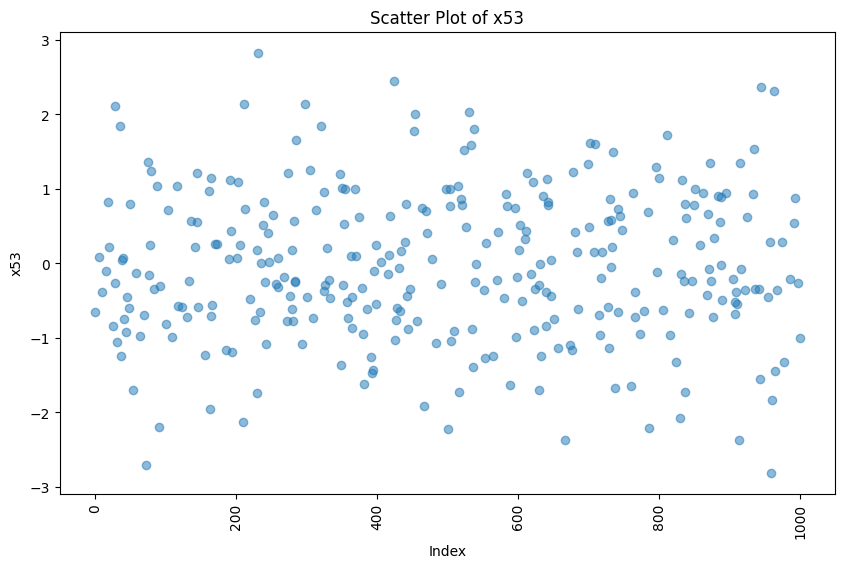

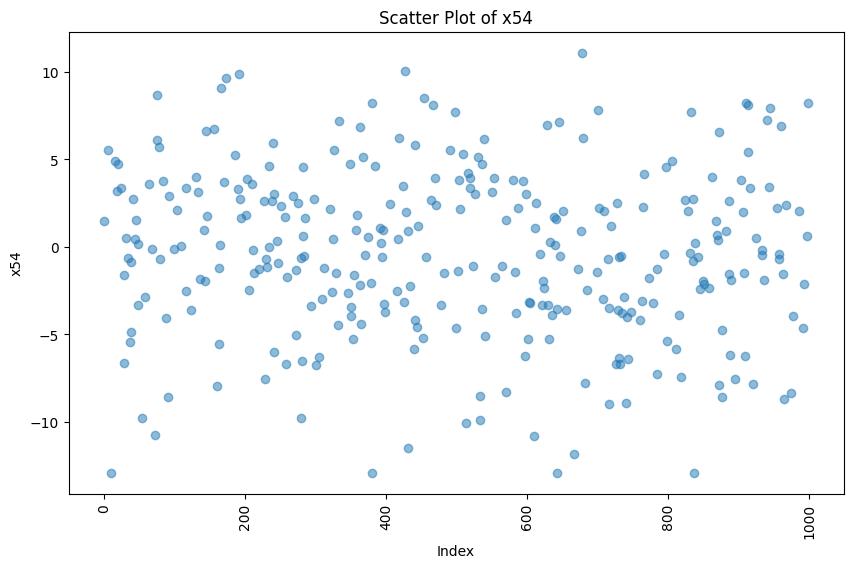

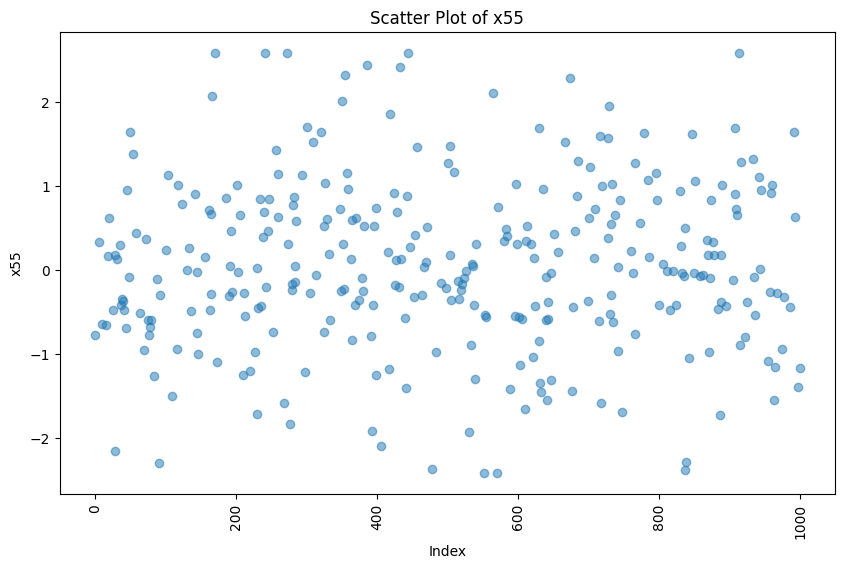

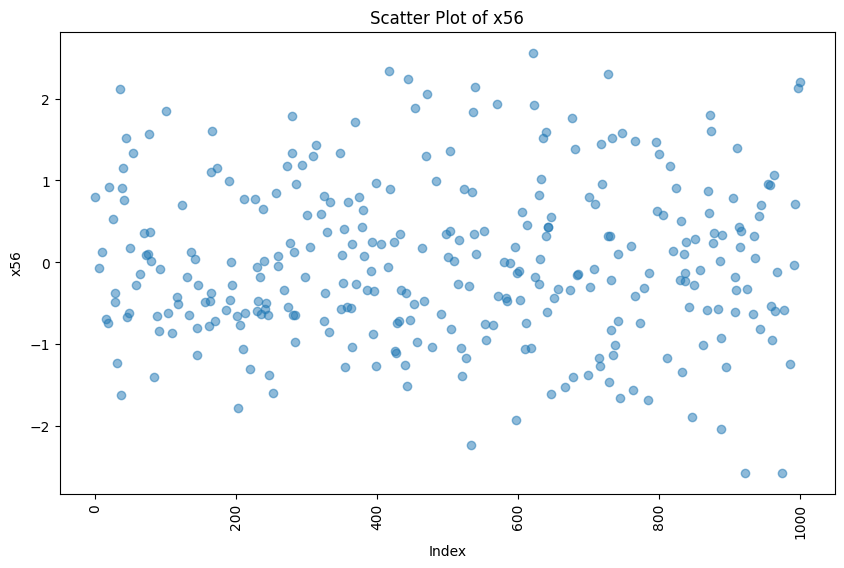

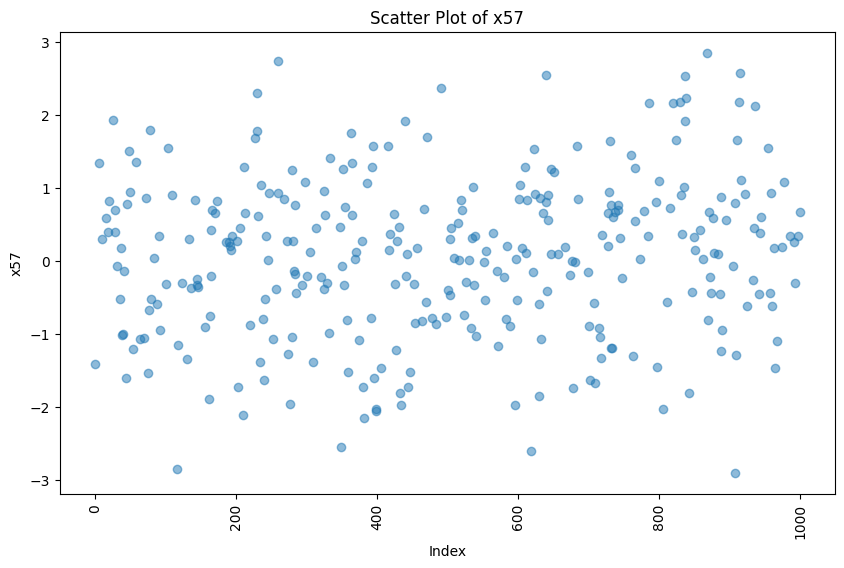

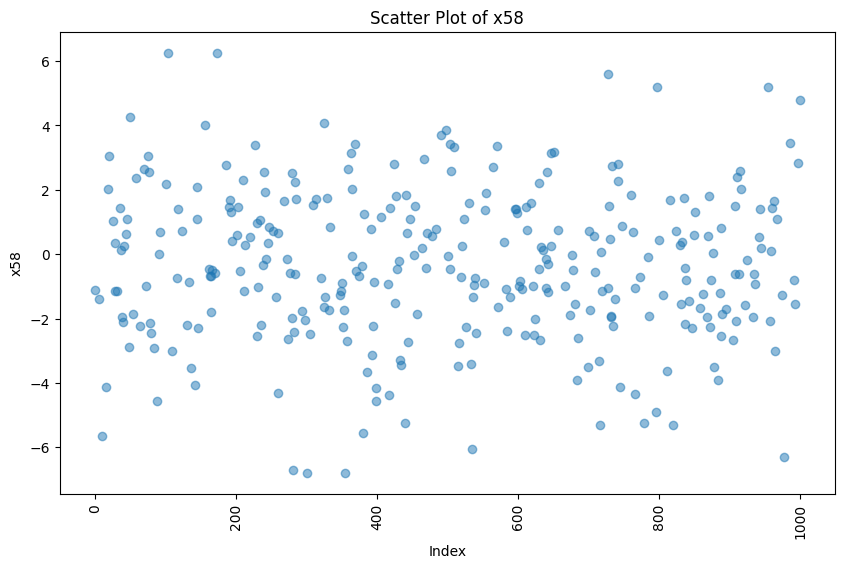

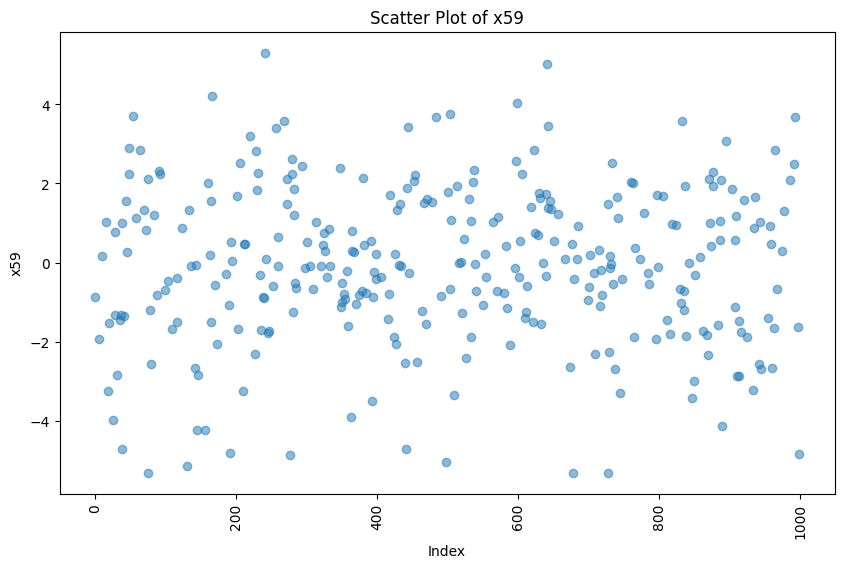

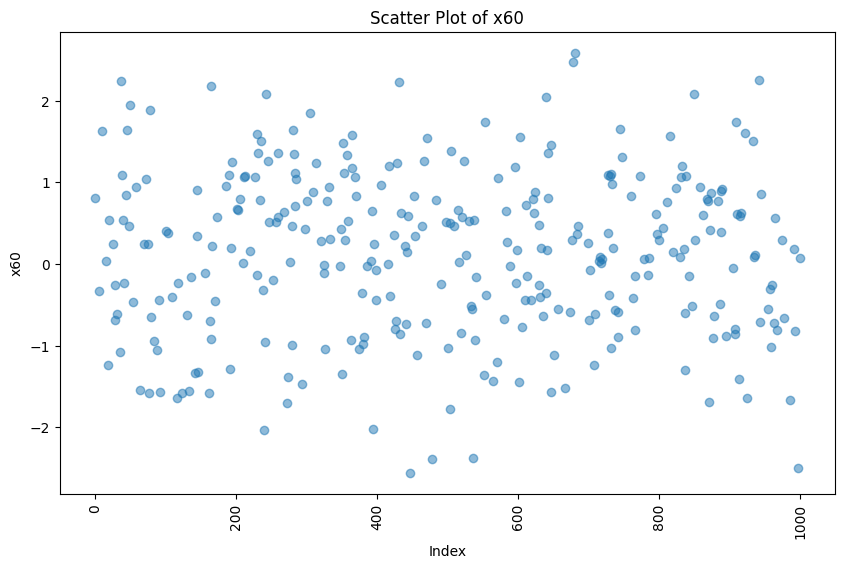

In [50]:
#Visualizing Outliers

# Create a scatter plot for each numerical column
for col in num_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[col], alpha=0.5)
    plt.title(f'Scatter Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.xticks(rotation=90)
    plt.show()

In [51]:
# outlyers are  clipped
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in x1: 0
Outliers in x2: 0
Outliers in x3: 0
Outliers in x6: 0
Outliers in x7: 0
Outliers in x8: 0
Outliers in x9: 0
Outliers in x10: 0
Outliers in x11: 0
Outliers in x12: 0
Outliers in x13: 0
Outliers in x14: 0
Outliers in x15: 0
Outliers in x17: 0
Outliers in x19: 0
Outliers in x21: 0
Outliers in x22: 0
Outliers in x23: 0
Outliers in x24: 0
Outliers in x25: 0
Outliers in x26: 0
Outliers in x27: 0
Outliers in x28: 0
Outliers in x29: 0
Outliers in x30: 0
Outliers in x31: 0
Outliers in x32: 0
Outliers in x33: 0
Outliers in x34: 0
Outliers in x35: 0
Outliers in x36: 0
Outliers in x37: 0
Outliers in x38: 0
Outliers in x39: 0
Outliers in x40: 0
Outliers in x41: 0
Outliers in x42: 0
Outliers in x43: 0
Outliers in x44: 0
Outliers in x45: 0
Outliers in x46: 0
Outliers in x47: 0
Outliers in x48: 0
Outliers in x49: 0
Outliers in x50: 0
Outliers in x51: 0
Outliers in x52: 0
Outliers in x53: 0
Outliers in x54: 0
Outliers in x55: 0
Outliers in x56: 0
Outliers in x57: 0
Outliers in x58: 0


# Encoding?

# What’s the Difference Between Label Encoding and One-Hot Encoding?

Both encoding methods convert categorical data (e.g., "red," "blue," "green") into numerical formats that machine learning algorithms can process. Here’s how they work:

## Label Encoding

- **How it works**: Assigns a unique integer to each category in a column.
- **Example**: For a "Color" column with values "red," "blue," and "green":
  - "red" → 0
  - "blue" → 1
  - "green" → 2
- **Result**: The column becomes a single numerical column (e.g., [0, 1, 2]).

### Pros:
- Simple and efficient—keeps the dataset compact with just one column.

### Cons:
- Introduces an artificial order (e.g., 2 > 1 > 0), which can mislead some algorithms into assuming "green" is greater than "blue," even if no such relationship exists.

## One-Hot Encoding

- **How it works**: Creates a new binary column for each category.
- **Example**: For the same "Color" column:
  - "Color_red": [1, 0, 0]
  - "Color_blue": [0, 1, 0]
  - "Color_green": [0, 0, 1]
- **Result**: Each category gets its own column, with 1s and 0s indicating presence or absence.

### Pros:
- Avoids implying any order between categories, making it ideal when categories are unrelated.

### Cons:
- Increases the number of columns, which can be a problem if there are many categories.

# Which Should You Use: Label Encoding or One-Hot Encoding?

To choose the right encoding for your dataset, we need to consider two key factors: 

1. **The Nature of Your Categorical Variables**: 
   - If your categorical variable has an inherent order (e.g., "low," "medium," "high"), label encoding may be more appropriate.
   - If your categorical variable is nominal (e.g., "red," "blue," "green") with no inherent order, one-hot encoding is typically the better choice.

2. **The Machine Learning Algorithm You Plan to Use**: 
   - Some algorithms, like decision trees and random forests, can handle label encoding well without being misled by the numerical values.
   - Other algorithms, such as linear regression or logistic regression, may perform better with one-hot encoding to avoid introducing artificial relationships between categories.

By considering these factors, you can make a more informed decision on which encoding method to use for your specific dataset and machine learning task.

# 1. Nature of Your Categorical Variables

Categorical variables can be:

- **Nominal**: No inherent order (e.g., colors: "red," "blue," "green"; or codes: "a8," "e2").
- **Ordinal**: Natural order exists (e.g., sizes: "small," "medium," "large").

From your sample data (e.g., x4 = a8, x5 = e2), these look like nominal categories—codes or identifiers without an obvious order. For nominal data:

- **Label Encoding**: Can mislead algorithms by suggesting an order (e.g., "a8" = 0, "a9" = 1) that doesn’t exist.
- **One-Hot Encoding**: Is better because it treats each category independently, avoiding any implied ranking.

# 2. Number of Unique Categories

If a column has many unique values (e.g., >10), one-hot encoding creates lots of new columns, which can make your dataset large and harder to handle.




In [52]:
for col in ['x4', 'x5', 'x16', 'x18', 'x20']:
    print(f"{col}: {df[col].nunique()} unique values")

x4: 10 unique values
x5: 10 unique values
x16: 5 unique values
x18: 10 unique values
x20: 7 unique values


# DOING ONE HOT ECNDOING 

In [53]:
df_encoded = pd.get_dummies(df, columns=['x4', 'x5', 'x16', 'x18', 'x20'], drop_first=True)

# Feature and targe separation

In [54]:
# Features: all columns except 'y'
X = df_encoded.drop('y', axis=1)

# Target: only the 'y' column
y = df_encoded['y']

# What Are Standardization and Normalization?

Both standardization and normalization are techniques to scale numerical features in your dataset so that they have similar ranges or distributions. This is crucial for many machine learning algorithms to perform well. Here’s a breakdown:

## Standardization

- **What it does**: Transforms numerical features to have a mean of 0 and a standard deviation of 1 (unit variance).

## Normalization

- **What it does**: Scales numerical features to a fixed range, typically [0, 1] or [-1, 1].

# When to apply 
Look at the min, max, and std (standard deviation)
If columns have very different ranges (e.g., one column ranges from 0 to 1, another from -1000 to 1000), scaling is needed to ensure no single feature dominates.
If the ranges are similar (e.g., all columns are roughly 0 to 10), scaling might still help but is less critical.

In [55]:
# checking ranges
num_cols = X.select_dtypes(include=['number']).columns
print(X[num_cols].describe())

               x1          x2          x3          x6          x7          x8  \
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000   
mean    -0.084659    0.535758   -0.059635   -1.389106   -0.007527    0.056582   
std      2.145946    3.214355    2.072058    1.701288    1.042132    1.024512   
min     -5.590183   -7.653593   -5.550030   -6.160450   -2.737718   -2.529370   
25%     -1.471448   -1.576118   -1.420658   -2.540071   -0.706893   -0.574629   
50%     -0.252623    0.331821    0.022491   -1.361619   -0.027378   -0.010997   
75%      1.274376    2.739998    1.332258   -0.126484    0.646991    0.728531   
max      5.393111    9.214172    4.694203    3.050407    2.677817    2.683272   

               x9         x10         x11         x12  ...         x51  \
count  312.000000  312.000000  312.000000  312.000000  ...  312.000000   
mean     0.110017   -0.355992   -0.022253   -0.341542  ...    0.046896   
std      0.952385    4.302098    0.961304    4.7

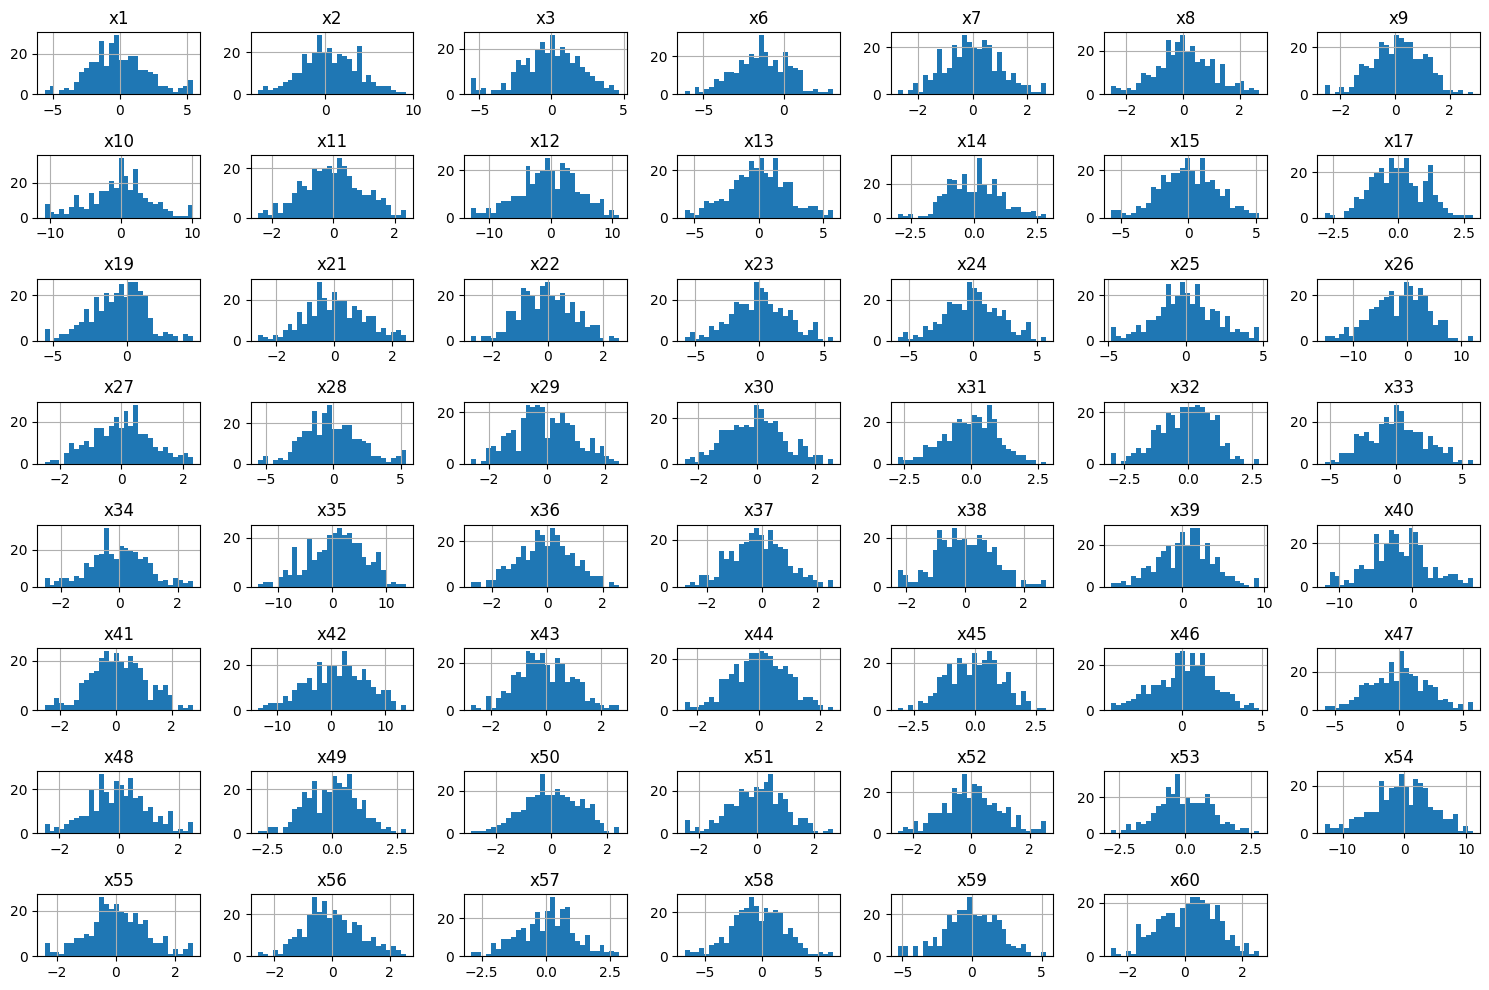

In [56]:
X[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Applying StandardScaler

In [57]:
# Applying StandardScaler

# Identify numerical columns (exclude one-hot encoded columns if they exist)
num_cols = X.select_dtypes(include=['number']).columns
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Check the result
print(X[num_cols].describe())

                 x1            x2            x3            x6          x7  \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  312.000000   
mean   1.138690e-17  1.708035e-17 -1.423363e-18 -5.693451e-18    0.000000   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00    1.001606   
min   -2.569668e+00 -2.551836e+00 -2.653987e+00 -2.809054e+00   -2.624023   
25%   -6.472746e-01 -6.580694e-01 -6.579010e-01 -6.776121e-01   -0.672170   
50%   -7.839602e-02 -6.354767e-02  3.969876e-02  1.618280e-02   -0.019079   
75%    6.343209e-01  6.868505e-01  6.728232e-01  7.433490e-01    0.629066   
max    2.556714e+00  2.704230e+00  2.297945e+00  2.613694e+00    2.580919   

                 x8            x9           x10           x11           x12  \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean   3.416071e-17 -1.138690e-17  8.540177e-18 -3.416071e-17 -3.416071e-17   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00  1.0016

# Apply normalization

In [58]:
# # 
# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and transform numerical columns
# X[num_cols] = scaler.fit_transform(X[num_cols])

# # Check the result
# print(X[num_cols].describe())

# Important point 
5. Save the Scaler for Later
If you’re splitting your data into training and test sets (a later step), fit the scaler only on the training data and apply it to the test data to avoid data leakage:

In [59]:
# from sklearn.model_selection import train_test_split

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit scaler on training data only
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# # Transform test data using the same scaler
# X_test[num_cols] = scaler.transform(X_test[num_cols])

# SMOTE

# What is SMOTE?

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in classification datasets by oversampling the minority class. It generates synthetic samples for the minority class rather than duplicating existing ones, which helps balance the dataset.

## How it works:

1. For each sample in the minority class, SMOTE finds its \( k \)-nearest neighbors (typically \( k = 5 \)).
2. It creates new synthetic samples by interpolating between the original sample and its neighbors. For example, a new point might be a random point along the line connecting the original sample and a neighbor.
3. This increases the number of minority class samples, making the classes more balanced.

## Example:

If your dataset has 90 samples of class 0 (majority) and 10 samples of class 1 (minority), SMOTE can generate additional synthetic samples for class 1 to balance the dataset (e.g., 90 samples for each class).

# When Do You Need SMOTE?

SMOTE should be applied in scenarios where:

- **Class Imbalance**: Your dataset exhibits a significant disparity in class distribution, with one class having far fewer samples than the other.
  
- **Binary Classification**: This is especially common in binary classification tasks, where one class (e.g., y = 1) is underrepresented compared to the other (e.g., y = 0).

- **Model Training**: It is beneficial to use SMOTE before training your model to ensure that the classifier has enough examples from the minority class to learn from, which can lead to improved performance and generalization.

- **Performance Improvement**: If your model struggles to predict the minority class accurately, applying SMOTE can help enhance its ability to recognize and classify these instances effectively.


# Signs You Need SMOTE:

## Check Class Distribution:

1. **Calculate the number of samples for each class in y**:



In [60]:
print(y.value_counts())
#2. **Evaluate the Counts**: If the counts are highly skewed (e.g., 90% class 0, 10% class 1), you have an imbalance.

#3. **Rule of Thumb**: A common rule of thumb is that if the minority class is less than 20-30% of the majority class, you should consider addressing the imbalance.


y
0    258
1     54
Name: count, dtype: int64


# As you cas see imbalnace exist so we have to apply smote

In [61]:
df_encoded

,x1,x2,x3,x6,x7,x8,x9,x10,x11,x12,...,x18_d6,x18_d7,x18_d8,x18_d9,x20_b4,x20_b5,x20_b6,x20_b7,x20_b8,x20_b9
0,2.425846,2.781246,-0.949030,-2.698882,-1.265862,1.303713,-0.623570,-0.383982,-1.178374,1.480919,...,False,False,False,False,False,False,True,False,False,False
6,-2.608094,5.396492,2.414872,-1.133706,1.093787,-0.611533,-0.414955,-9.711383,-1.711577,5.546660,...,False,False,False,False,False,False,True,False,False,False
10,-2.694033,1.273626,-1.417370,-3.419667,0.220109,-1.431150,-0.254128,9.767328,1.202118,-12.898374,...,True,False,False,False,False,False,False,False,False,False
16,-5.590183,-0.542491,-1.605276,-1.860745,-0.093993,1.690710,0.312523,-9.165345,0.689097,4.903877,...,False,False,False,False,False,False,True,False,False,False
19,0.243731,3.951658,-0.235670,-5.139376,1.672898,0.488313,-0.918181,-1.033498,0.058531,3.193579,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,-0.203368,0.097916,1.604698,-3.115074,1.185786,-0.673659,1.036961,-4.028996,-0.246146,2.037305,...,False,False,False,False,False,False,False,True,False,False
991,1.081358,-3.130108,3.510072,-1.367228,-2.717839,-0.697713,-0.353306,-8.370477,0.638145,-4.623239,...,True,False,False,False,True,False,False,False,False,False
993,-1.720144,-3.505089,1.916981,0.151601,1.615432,-2.529370,-0.075211,2.083763,1.057928,-2.108694,...,False,False,False,False,False,False,False,False,False,False
997,5.393111,-0.204798,-0.098950,-3.549766,0.382518,0.379074,-1.343742,2.937457,-1.081328,0.602280,...,False,False,False,False,False,False,True,False,False,False


In [62]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X and y are your features and target after preprocessing
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

y
0    258
1    258
Name: count, dtype: int64


In [63]:



# Assuming X and y are your features and target
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit scaler on training data only
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test data using the same scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify class balance
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
y
1    209
0    209
Name: count, dtype: int64


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Dictionary to store results
results = {}

# Function to evaluate a model
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Cross-validation scores
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Store results
    results[model_name] = {
        'CV Accuracy': cv_accuracy,
        'CV F1': cv_f1,
        'Test Accuracy': accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F1': f1,
        'Test ROC-AUC': roc_auc
    }

# List of models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('Naive Bayes', GaussianNB())
]

# Apply each model
for model_name, model in models:
    print(f"\nTraining {model_name}...")
    evaluate_model(model, model_name, X_train_resampled, y_train_resampled, X_test, y_test)

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)


Training Logistic Regression...

Training K-Nearest Neighbors...

Training Decision Tree...

Training Random Forest...

Training Support Vector Machine...

Training XGBoost...


c:\Users\zanib\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zanib\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zanib\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zanib\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:12] WARNING: C:\actio


Training Naive Bayes...

Model Performance Summary:
                        CV Accuracy     CV F1  Test Accuracy  Test Precision  \
Logistic Regression        0.840075  0.829300       0.650794        0.277778   
K-Nearest Neighbors        0.629489  0.730814       0.476190        0.279070   
Decision Tree              0.842283  0.844495       0.603175        0.133333   
Random Forest              0.959495  0.958873       0.746032        0.250000   
Support Vector Machine     0.964200  0.963938       0.746032        0.000000   
XGBoost                    0.918876  0.917106       0.761905        0.400000   
Naive Bayes                0.547935  0.688739       0.253968        0.188679   

                        Test Recall   Test F1  Test ROC-AUC  
Logistic Regression        0.357143  0.312500      0.607872  
K-Nearest Neighbors        0.857143  0.421053      0.673469  
Decision Tree              0.142857  0.137931      0.438776  
Random Forest              0.071429  0.111111      0.48615

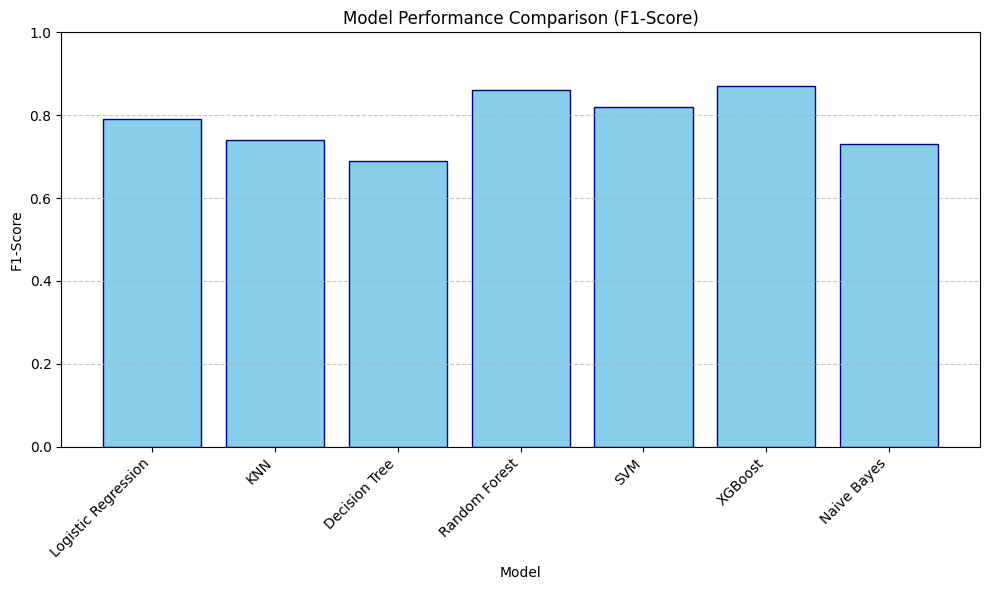

In [66]:
# Sample results (replace with your actual results_df)
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'Naive Bayes'],
    'F1_Score': [0.79, 0.74, 0.69, 0.86, 0.82, 0.87, 0.73]  # Example F1-scores
}
df_results = pd.DataFrame(results)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_results['Model'], df_results['F1_Score'], color='skyblue', edgecolor='navy')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model Performance Comparison (F1-Score)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()